## Training the Neural Network

In [5]:
import numpy as n
import pandas as p
import glob
import matplotlib.pyplot

In [6]:
path_1="D:\\DATASET\\X & y\\Train\\"
path_2="D:\\DATASET\\X & y\\Test\\"

In [7]:
cols_1=n.concatenate([n.arange(178),n.arange(179,285),n.arange(286,332),n.arange(333,440)],axis=0)

## 1-D CNN Using Acclerometer Recordings

In [8]:
X_train={}
X_test={}
y_train={}
y_test={}

file_list_1=glob.glob(path_1+"X_train\\"+"X_train_*.csv")
for file_path in file_list_1:
    X_train[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))
    
file_list_2=glob.glob(path_1+"y_train\\"+"y_train_*.csv")
for file_path in file_list_2:
    y_train[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))
    
file_list_3=glob.glob(path_2+"X_test\\"+"X_test_*.csv")
for file_path in file_list_3:
    X_test[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))
    
file_list_4=glob.glob(path_2+"y_test\\"+"y_test_*.csv")
for file_path in file_list_4:
    y_test[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))

In [9]:
X_Input={}
y_Input={}
X_Output={}
y_Output={}

for key in cols_1:
    X_Input[key]=n.reshape(n.asarray(X_train[str(key)]),(X_train[str(key)].shape[0],4001,2))
    y_Input[key]=n.reshape(n.asarray(y_train[str(key)]),(y_train[str(key)].shape[0],1))
    X_Output[key]=n.reshape(n.asarray(X_test[str(key)]),(X_test[str(key)].shape[0],4001,2))
    y_Output[key]=n.reshape(n.asarray(y_test[str(key)]),(y_test[str(key)].shape[0],1))

In [6]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Dense,Flatten

model=Sequential()

model.add(Conv1D(filters=300,kernel_size=150,input_shape=(4001,2),activation='relu',padding="same"))
model.add(MaxPool1D())
model.add(Conv1D(filters=150,activation='relu',kernel_size=10))
model.add(Flatten())
model.add(Dense(output_dim=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # Remove the CWD from sys.path while we load stuff.


In [14]:
Network_1=[]

for key in cols_1:
    print('Training of CNN for Joint: '+str(key+1)+' initiated')
    model.fit(x=X_Input[key],y=y_Input[key],batch_size=20,validation_data=(X_Output[key], y_Output[key]),epochs=10)
    Network_1.append(model)
    print('Training of CNN for Joint: '+str(key+1)+' completed')
    print("\n")

Training of CNN for Joint: 1 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4000 - val_loss: 0.6930 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6936 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6938 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6941 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6944 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.69

60/60 [==============================] - 1s 9ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.5051 - val_accuracy: 0.8750
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.4963 - val_accuracy: 0.8750
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.8125
Training of CNN for Joint: 11 completed


Training of CNN for Joint: 12 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5283 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5483 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==========================

60/60 [==============================] - 1s 9ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1767 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 9.6345e-04 - accuracy: 1.0000 - val_loss: 1.1663 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 9.5054e-04 - accuracy: 1.0000 - val_loss: 1.1475 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 8.4517e-04 - accuracy: 1.0000 - val_loss: 1.1859 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 7.8577e-04 - accuracy: 1.0000 - val_loss: 1.2214 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 7.5945e-04 - accuracy: 1.0000 - val_loss: 1.2529 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 7.3239e-04 - accuracy: 1.0000 - val_loss: 1.2705 - val_accuracy: 0.8125
Epoch 8

Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0516 - accuracy: 0.9667 - val_loss: 0.2419 - val_accuracy: 0.8750
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0247 - accuracy: 0.9833 - val_loss: 0.5803 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.0545 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.9900 - val_accuracy: 0.8125
Training of CNN for Joint: 27 completed


Training of CNN for Joint: 28 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1169 - accuracy: 0.9667 - val_loss: 0.7647 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.2430 - val_accuracy: 0.8125
Epoch 3/10
60/60 [===============

Training of CNN for Joint: 32 completed


Training of CNN for Joint: 33 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1236 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.0545 - val_accuracy: 0.8750
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 7.5528e-04 - accuracy: 1.0000 - val_loss: 1.0033 - val_accuracy: 0.8750
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 7.3935e-04 - accuracy: 1.0000 - val_loss: 0.9699 - val_accuracy: 0.8750
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 7.5214e-04 - accuracy: 1.0000 - val_loss: 0.9598 - val_accuracy: 0.8750
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 7.4006e-04 - accuracy: 1.0000 - val_loss: 0.9694 - val_accuracy: 0.8750
Epoch 7/10
60/60 [

Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 3.1014e-04 - accuracy: 1.0000 - val_loss: 1.4739 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 3.0937e-04 - accuracy: 1.0000 - val_loss: 1.5015 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 2.9526e-04 - accuracy: 1.0000 - val_loss: 1.5052 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8911e-04 - accuracy: 1.0000 - val_loss: 1.5003 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8197e-04 - accuracy: 1.0000 - val_loss: 1.4954 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 2.7761e-04 - accuracy: 1.0000 - val_loss: 1.4906 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 2.7806e-04 - accuracy: 1.0000 - val_loss: 1.4712 - val_accuracy:

60/60 [==============================] - 1s 9ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.4700 - val_accuracy: 0.8750
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.4532 - val_accuracy: 0.8750
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.3609 - val_accuracy: 0.8125
Training of CNN for Joint: 48 completed


Training of CNN for Joint: 49 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0863 - accuracy: 0.9833 - val_loss: 0.2898 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 0.4131 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.4780 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==========================

Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 8.3225e-04 - accuracy: 1.0000 - val_loss: 1.4460 - val_accuracy: 0.8750
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 8.0971e-04 - accuracy: 1.0000 - val_loss: 1.4415 - val_accuracy: 0.8750
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 7.8857e-04 - accuracy: 1.0000 - val_loss: 1.4338 - val_accuracy: 0.8750
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 7.8248e-04 - accuracy: 1.0000 - val_loss: 1.4342 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 7.7770e-04 - accuracy: 1.0000 - val_loss: 1.4231 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 7.5902e-04 - accuracy: 1.0000 - val_loss: 1.4245 - val_accuracy: 0.8125
Training of CNN for Joint: 59 completed


Training of CNN for Joint: 60 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/1

60/60 [==============================] - 1s 9ms/step - loss: 0.3596 - accuracy: 0.8833 - val_loss: 1.0772 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1896 - accuracy: 0.9333 - val_loss: 0.4817 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0694 - accuracy: 1.0000 - val_loss: 0.3711 - val_accuracy: 0.8750
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0692 - accuracy: 1.0000 - val_loss: 0.3863 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0702 - accuracy: 1.0000 - val_loss: 0.4636 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.5014 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 0.4062 - val_accuracy: 0.8125
Epoch 8/10
60/60 [=============

60/60 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.0328 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0505 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.0431 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.0427 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.9965 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.9663 - val_accuracy: 0.6875
Training of CNN for Joint: 75 completed


Training of CNN for Joint: 76 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==========================

Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 5.1247e-05 - accuracy: 1.0000 - val_loss: 2.4639 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 4.9698e-05 - accuracy: 1.0000 - val_loss: 2.4954 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 4.9611e-05 - accuracy: 1.0000 - val_loss: 2.5132 - val_accuracy: 0.7500
Training of CNN for Joint: 80 completed


Training of CNN for Joint: 81 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.1519e-04 - accuracy: 1.0000 - val_loss: 2.9751 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 6.7757e-05 - accuracy: 1.0000 - val_loss: 2.8180 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 4.4110e-05 - accuracy: 1.0000 - val_loss: 2.6892 - val_accuracy: 0.7500
Epoch 4/1

60/60 [==============================] - 1s 9ms/step - loss: 1.8147 - accuracy: 0.8667 - val_loss: 4.5669 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.5058 - accuracy: 0.8833 - val_loss: 3.4533 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1864 - accuracy: 0.9500 - val_loss: 1.2648 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2286 - accuracy: 0.9667 - val_loss: 1.2834 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0980 - accuracy: 0.9833 - val_loss: 2.1779 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1109 - accuracy: 0.9667 - val_loss: 2.0988 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0619 - accuracy: 0.9667 - val_loss: 1.2807 - val_accuracy: 0.6875
Epoch 9/10
60/60 [=============

60/60 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0830 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.9272 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.8575 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8799 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.9466 - val_accuracy: 0.7500
Training of CNN for Joint: 96 completed


Training of CNN for Joint: 97 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.8593 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==========================

60/60 [==============================] - 1s 9ms/step - loss: 1.7981e-04 - accuracy: 1.0000 - val_loss: 1.4487 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 1.7581e-04 - accuracy: 1.0000 - val_loss: 1.4356 - val_accuracy: 0.7500
Training of CNN for Joint: 101 completed


Training of CNN for Joint: 102 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 5.2658e-04 - accuracy: 1.0000 - val_loss: 1.7733 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 1.9922e-04 - accuracy: 1.0000 - val_loss: 1.6178 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.8003e-04 - accuracy: 1.0000 - val_loss: 1.5062 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 1.9926e-04 - accuracy: 1.0000 - val_loss: 1.4815 - val_accuracy: 0.7500
Epoch 5/10
60/60 [

60/60 [==============================] - 1s 9ms/step - loss: 1.1543e-04 - accuracy: 1.0000 - val_loss: 1.8114 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0844e-04 - accuracy: 1.0000 - val_loss: 1.7806 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0630e-04 - accuracy: 1.0000 - val_loss: 1.7489 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0287e-04 - accuracy: 1.0000 - val_loss: 1.7494 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0163e-04 - accuracy: 1.0000 - val_loss: 1.7591 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0042e-04 - accuracy: 1.0000 - val_loss: 1.7582 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0221e-04 - accuracy: 1.0000 - val_loss: 1.7914 - val_accuracy: 0.7500
Epo

Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3899 - accuracy: 0.9500 - val_loss: 0.6178 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3721 - accuracy: 0.9500 - val_loss: 0.6347 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3496 - accuracy: 0.9500 - val_loss: 0.6044 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2842 - accuracy: 0.9500 - val_loss: 0.4412 - val_accuracy: 0.8750
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1856 - accuracy: 0.9333 - val_loss: 0.3169 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1799 - accuracy: 0.9333 - val_loss: 0.3109 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1358 - accuracy: 0.9333 - val_loss: 0.3734 - val_accuracy: 0.8125
Training of CNN for

Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.9575 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.9280 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.9109 - val_accuracy: 0.7500
Training of CNN for Joint: 117 completed


Training of CNN for Joint: 118 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.9850 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.9606 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.9925 - val_accuracy: 0.7500
Epoch 4/10
60/60 [=============

60/60 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.1515 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 8.6132e-04 - accuracy: 1.0000 - val_loss: 1.0289 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 8.6626e-04 - accuracy: 1.0000 - val_loss: 0.9661 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 8.8433e-04 - accuracy: 1.0000 - val_loss: 0.9442 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 8.1059e-04 - accuracy: 1.0000 - val_loss: 0.9646 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 7.7141e-04 - accuracy: 1.0000 - val_loss: 0.9889 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 7.5178e-04 - accuracy: 1.0000 - val_loss: 1.0067 - val_accuracy: 0.7500
Epoch 8

60/60 [==============================] - 1s 9ms/step - loss: 0.7494 - accuracy: 0.4667 - val_loss: 0.7591 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7133 - accuracy: 0.5333 - val_loss: 0.9179 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7489 - accuracy: 0.5333 - val_loss: 0.9588 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7580 - accuracy: 0.5333 - val_loss: 0.9261 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7352 - accuracy: 0.5333 - val_loss: 0.8683 - val_accuracy: 0.3125
Training of CNN for Joint: 133 completed


Training of CNN for Joint: 134 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.5511 - accuracy: 0.6833 - val_loss: 0.7166 - val_accuracy: 0.5000
Epoch 2/10
60/60 [========================

Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.7500
Training of CNN for Joint: 138 completed


Training of CNN for Joint: 139 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0296 - accuracy: 0.9833 - val_loss: 1.7394 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0240 - accuracy: 0.9833 - val_loss: 1.6295 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0230 - accuracy: 0.9833 - val_loss: 1.5926 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.5662 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 1.5376 - val_accuracy: 0.8125
Epoch 6/10
60/60 [=============

Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.4499 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4865 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.5259 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.5474 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5695 - val_accuracy: 0.8125
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.5885 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.6002 - val_accuracy: 0.7500
Epoch 10/10
60/60 [=

Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.1118 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 9.1035e-04 - accuracy: 1.0000 - val_loss: 1.1490 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 8.2005e-04 - accuracy: 1.0000 - val_loss: 1.1790 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 7.9120e-04 - accuracy: 1.0000 - val_loss: 1.1977 - val_accuracy: 0.7500
Training of CNN for Joint: 149 completed


Training of CNN for Joint: 150 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.0255 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.9603 - val_accuracy: 0.7500
Epoch 3/10
60/60 [=

Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8943e-04 - accuracy: 1.0000 - val_loss: 1.6145 - val_accuracy: 0.7500
Training of CNN for Joint: 154 completed


Training of CNN for Joint: 155 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 9.8198 - accuracy: 0.4667 - val_loss: 4.2989 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 6.3011 - accuracy: 0.4667 - val_loss: 2.1872 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8625 - accuracy: 0.4667 - val_loss: 0.7849 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.9209 - accuracy: 0.4667 - val_loss: 0.9115 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.8282 - accuracy: 0.5333 - val_loss: 1.5573 - val_accuracy: 0.3125
Epoch 6/10
60/60 [=========

Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0165 - accuracy: 0.9833 - val_loss: 1.2442 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.2993 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2989 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2620 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.2113 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.1601 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1157 - val_accuracy: 0.7500
Epoch 10/10
60/60 [=

60/60 [==============================] - 1s 9ms/step - loss: 3.0077e-04 - accuracy: 1.0000 - val_loss: 1.8325 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8551e-04 - accuracy: 1.0000 - val_loss: 1.8329 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 2.7688e-04 - accuracy: 1.0000 - val_loss: 1.8376 - val_accuracy: 0.6250
Training of CNN for Joint: 170 completed


Training of CNN for Joint: 171 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 4.1784e-04 - accuracy: 1.0000 - val_loss: 1.7692 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 3.8716e-04 - accuracy: 1.0000 - val_loss: 1.7625 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 3.5782e-04 - accuracy: 1.0000 - val_loss: 1.7514 - val_accuracy: 0.6250
Epoch 4/10
60/60 [

Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.5710 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0279 - accuracy: 0.9833 - val_loss: 2.5449 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.5055 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.4847 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.4735 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.4542 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.4344 - val_accuracy: 0.6875
Epoch 10/10
60/60 [=

60/60 [==============================] - 1s 9ms/step - loss: 1.2160e-05 - accuracy: 1.0000 - val_loss: 1.1942 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0178e-05 - accuracy: 1.0000 - val_loss: 1.2212 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 9.1271e-06 - accuracy: 1.0000 - val_loss: 1.2332 - val_accuracy: 0.8125
Training of CNN for Joint: 192 completed


Training of CNN for Joint: 193 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 6.3194e-05 - accuracy: 1.0000 - val_loss: 1.1773 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 2.3754e-05 - accuracy: 1.0000 - val_loss: 1.1403 - val_accuracy: 0.8750
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.9837e-05 - accuracy: 1.0000 - val_loss: 1.1223 - val_accuracy: 0.8750
Epoch 4/10
60/60 [

Training of CNN for Joint: 197 completed


Training of CNN for Joint: 198 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.8310 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.7961 - val_accuracy: 0.8750
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.7517 - val_accuracy: 0.8750
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7075 - val_accuracy: 0.8750
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.6595 - val_accuracy: 0.8750
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7091 - val_accuracy: 0.8750
Epoch 7/10
60/60 [==============

Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0544 - accuracy: 0.9833 - val_loss: 2.5008 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 2.3962 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 2.3015 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 2.1903 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 2.1013 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.1233 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.0950 - val_accuracy: 0.6250
Training of CNN for

60/60 [==============================] - 1s 9ms/step - loss: 1.5048e-04 - accuracy: 1.0000 - val_loss: 1.2999 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4515e-04 - accuracy: 1.0000 - val_loss: 1.2896 - val_accuracy: 0.7500
Training of CNN for Joint: 213 completed


Training of CNN for Joint: 214 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 3.5251e-04 - accuracy: 1.0000 - val_loss: 1.1790 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 3.0146e-04 - accuracy: 1.0000 - val_loss: 1.1954 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 2.4403e-04 - accuracy: 1.0000 - val_loss: 1.2250 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 2.1750e-04 - accuracy: 1.0000 - val_loss: 1.2560 - val_accuracy: 0.7500
Epoch 5/10
60/60 [

60/60 [==============================] - 1s 9ms/step - loss: 1.6126e-04 - accuracy: 1.0000 - val_loss: 0.6948 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 1.5630e-04 - accuracy: 1.0000 - val_loss: 0.6964 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.5237e-04 - accuracy: 1.0000 - val_loss: 0.7019 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4368e-04 - accuracy: 1.0000 - val_loss: 0.7065 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4023e-04 - accuracy: 1.0000 - val_loss: 0.7124 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 1.3652e-04 - accuracy: 1.0000 - val_loss: 0.7202 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 1.3354e-04 - accuracy: 1.0000 - val_loss: 0.7286 - val_accuracy: 0.8125
Epo

Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0342e-04 - accuracy: 1.0000 - val_loss: 1.9828 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 8.9524e-05 - accuracy: 1.0000 - val_loss: 1.9961 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 7.8930e-05 - accuracy: 1.0000 - val_loss: 2.0094 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 7.6564e-05 - accuracy: 1.0000 - val_loss: 2.0257 - val_accuracy: 0.6875
Training of CNN for Joint: 229 completed


Training of CNN for Joint: 230 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 5.7395e-04 - accuracy: 1.0000 - val_loss: 1.8348 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 3.3412e-04 - accuracy: 1.0000 - val_loss: 1.8706 - val_accuracy: 0.8125
Epoch 3

Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 1.0676e-04 - accuracy: 1.0000 - val_loss: 3.2835 - val_accuracy: 0.6875
Training of CNN for Joint: 234 completed


Training of CNN for Joint: 235 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 3.2408e-04 - accuracy: 1.0000 - val_loss: 3.5032 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8435e-04 - accuracy: 1.0000 - val_loss: 3.4764 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 2.4984e-04 - accuracy: 1.0000 - val_loss: 3.4467 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 2.0802e-04 - accuracy: 1.0000 - val_loss: 3.4227 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 1.9108e-04 - accuracy: 1.0000 - val_loss: 3.3988 - val_accuracy: 0.6875
Epoch 6

60/60 [==============================] - 1s 9ms/step - loss: 0.1307 - accuracy: 0.9833 - val_loss: 2.4725 - val_accuracy: 0.5625
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1135 - accuracy: 0.9833 - val_loss: 2.4015 - val_accuracy: 0.5625
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0914 - accuracy: 0.9833 - val_loss: 2.3698 - val_accuracy: 0.5625
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0801 - accuracy: 0.9667 - val_loss: 2.3701 - val_accuracy: 0.5625
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0703 - accuracy: 0.9833 - val_loss: 2.3857 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0617 - accuracy: 0.9833 - val_loss: 2.4277 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 2.4808 - val_accuracy: 0.5625
Training of CNN for Joint: 245

Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.8697 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0318 - accuracy: 0.9833 - val_loss: 5.0039 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0277 - accuracy: 0.9833 - val_loss: 4.8404 - val_accuracy: 0.5625
Training of CNN for Joint: 250 completed


Training of CNN for Joint: 251 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 4.0496 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.9687 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.8994 - val_accuracy: 0.6250
Epoch 4/10
60/60 [=============

Training of CNN for Joint: 255 completed


Training of CNN for Joint: 256 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 4.2799e-04 - accuracy: 1.0000 - val_loss: 2.6417 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 4.0888e-04 - accuracy: 1.0000 - val_loss: 2.6363 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 3.8634e-04 - accuracy: 1.0000 - val_loss: 2.6277 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 3.6004e-04 - accuracy: 1.0000 - val_loss: 2.6197 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 3.4193e-04 - accuracy: 1.0000 - val_loss: 2.6123 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 3.2863e-04 - accuracy: 1.0000 - val_loss: 2.6047 - val_accuracy: 0.6250
Epoch 7/

Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3109 - accuracy: 0.9167 - val_loss: 0.7516 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3082 - accuracy: 0.9333 - val_loss: 0.7698 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3017 - accuracy: 0.9333 - val_loss: 0.7836 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2904 - accuracy: 0.9500 - val_loss: 0.7956 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2773 - accuracy: 0.9500 - val_loss: 0.8062 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2655 - accuracy: 0.9500 - val_loss: 0.8168 - val_accuracy: 0.6875
Training of CNN for Joint: 266 completed


Training of CNN for Joint: 267 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [=============

60/60 [==============================] - 1s 9ms/step - loss: 8.0591e-05 - accuracy: 1.0000 - val_loss: 1.5402 - val_accuracy: 0.8125
Training of CNN for Joint: 276 completed


Training of CNN for Joint: 277 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 3.5664e-04 - accuracy: 1.0000 - val_loss: 1.5292 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 6.3995e-04 - accuracy: 1.0000 - val_loss: 1.5808 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 9.2406e-05 - accuracy: 1.0000 - val_loss: 1.4506 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.8601 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0612 - accuracy: 0.9833 - val_loss: 1.9174 - val_accuracy: 0.8125
Epoch 6/10
60/60 [=========

Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.9218 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 7.9128e-04 - accuracy: 1.0000 - val_loss: 0.9166 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 6.8601e-04 - accuracy: 1.0000 - val_loss: 0.9123 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 5.3264e-04 - accuracy: 1.0000 - val_loss: 0.9081 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 4.5895e-04 - accuracy: 1.0000 - val_loss: 0.9050 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 4.0447e-04 - accuracy: 1.0000 - val_loss: 0.9018 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 3.8396e-04 - accuracy: 1.0000 - val_loss: 0.8992 - val_accuracy: 0.6

Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1125 - accuracy: 0.9833 - val_loss: 0.4211 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1038 - accuracy: 0.9667 - val_loss: 0.3956 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0959 - accuracy: 0.9667 - val_loss: 0.3806 - val_accuracy: 0.8125
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0822 - accuracy: 0.9667 - val_loss: 0.3713 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0759 - accuracy: 0.9833 - val_loss: 0.3816 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 0.4050 - val_accuracy: 0.8125
Training of CNN for Joint: 288 completed


Training of CNN for Joint: 289 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [=============

60/60 [==============================] - 1s 9ms/step - loss: 3.0123e-05 - accuracy: 1.0000 - val_loss: 2.3164 - val_accuracy: 0.6875
Training of CNN for Joint: 298 completed


Training of CNN for Joint: 299 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 2.8495e-05 - accuracy: 1.0000 - val_loss: 2.4391 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 2.7577e-05 - accuracy: 1.0000 - val_loss: 2.4444 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 2.7357e-05 - accuracy: 1.0000 - val_loss: 2.4489 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 2.6932e-05 - accuracy: 1.0000 - val_loss: 2.4523 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 2.6825e-05 - accuracy: 1.0000 - val_loss: 2.4554 - val_accuracy: 0.6875
Epoch 6/10
60/60 [=

60/60 [==============================] - 1s 9ms/step - loss: 3.6001 - accuracy: 0.4667 - val_loss: 1.3037 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 1.7312 - accuracy: 0.4667 - val_loss: 0.6408 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7511 - accuracy: 0.5333 - val_loss: 0.8305 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7413 - accuracy: 0.5333 - val_loss: 1.1242 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.8474 - accuracy: 0.5333 - val_loss: 1.0602 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7679 - accuracy: 0.5333 - val_loss: 0.8540 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7107 - accuracy: 0.5333 - val_loss: 0.7614 - val_accuracy: 0.3125
Epoch 10/10
60/60 [============

Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 7.3012e-05 - accuracy: 1.0000 - val_loss: 6.0065 - val_accuracy: 0.5625
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 6.7884e-05 - accuracy: 1.0000 - val_loss: 5.9842 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 6.0693e-05 - accuracy: 1.0000 - val_loss: 5.9655 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 5.6625e-05 - accuracy: 1.0000 - val_loss: 5.9481 - val_accuracy: 0.5625
Training of CNN for Joint: 314 completed


Training of CNN for Joint: 315 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.3560 - val_accuracy: 0.5625
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 3.3572e-04 - accuracy: 1.0000 - val_loss: 6.3445 - val_accuracy: 0.5625
Epoch 3/10


60/60 [==============================] - 1s 9ms/step - loss: 4.0421e-05 - accuracy: 1.0000 - val_loss: 2.8601 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 3.7806e-05 - accuracy: 1.0000 - val_loss: 2.8510 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 3.4744e-05 - accuracy: 1.0000 - val_loss: 2.8442 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 3.2475e-05 - accuracy: 1.0000 - val_loss: 2.8358 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 3.0270e-05 - accuracy: 1.0000 - val_loss: 2.8217 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 2.7896e-05 - accuracy: 1.0000 - val_loss: 2.8089 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 2.6323e-05 - accuracy: 1.0000 - val_loss: 2.8013 - val_accuracy: 0.6875
Epo

Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 6.3812e-04 - accuracy: 1.0000 - val_loss: 2.0283 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.9336 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.8196 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 4.8369e-04 - accuracy: 1.0000 - val_loss: 1.7198 - val_accuracy: 0.7500
Training of CNN for Joint: 336 completed


Training of CNN for Joint: 337 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0231 - accuracy: 0.9833 - val_loss: 1.4843 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 1.1743e-04 - accuracy: 1.0000 - val_loss: 1.4039 - val_accuracy: 0.7500
Epoch 3/10
60/60 [=

60/60 [==============================] - 1s 9ms/step - loss: 5.4608e-05 - accuracy: 1.0000 - val_loss: 1.1751 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 5.0184e-05 - accuracy: 1.0000 - val_loss: 1.1655 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 4.7618e-05 - accuracy: 1.0000 - val_loss: 1.1560 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 4.5621e-05 - accuracy: 1.0000 - val_loss: 1.1462 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 4.3228e-05 - accuracy: 1.0000 - val_loss: 1.1374 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 4.0223e-05 - accuracy: 1.0000 - val_loss: 1.1298 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 3.8962e-05 - accuracy: 1.0000 - val_loss: 1.1224 - val_accuracy: 0.7500
Epo

60/60 [==============================] - 1s 9ms/step - loss: 2.6444e-05 - accuracy: 1.0000 - val_loss: 3.6983 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 4.6018e-05 - accuracy: 1.0000 - val_loss: 3.9838 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 6.0436e-05 - accuracy: 1.0000 - val_loss: 4.2081 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 1.1647e-04 - accuracy: 1.0000 - val_loss: 4.3732 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 2.1760e-04 - accuracy: 1.0000 - val_loss: 4.4860 - val_accuracy: 0.6875
Training of CNN for Joint: 357 completed


Training of CNN for Joint: 358 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 4.2851 - val_accuracy: 0.6875
Epoch 2/10
60/60 [====

60/60 [==============================] - 1s 9ms/step - loss: 3.5010e-05 - accuracy: 1.0000 - val_loss: 2.7047 - val_accuracy: 0.6875
Training of CNN for Joint: 367 completed


Training of CNN for Joint: 368 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 8.6433e-05 - accuracy: 1.0000 - val_loss: 2.7407 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 7.9412e-05 - accuracy: 1.0000 - val_loss: 2.7340 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 7.2259e-05 - accuracy: 1.0000 - val_loss: 2.7263 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 6.8570e-05 - accuracy: 1.0000 - val_loss: 2.7173 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 6.1147e-05 - accuracy: 1.0000 - val_loss: 2.7080 - val_accuracy: 0.6875
Epoch 6/10
60/60 [=

60/60 [==============================] - 1s 9ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.9454 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.3461 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 6.4490e-04 - accuracy: 1.0000 - val_loss: 4.4198 - val_accuracy: 0.5625
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1086 - accuracy: 0.9833 - val_loss: 2.2438 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 9.4769e-04 - accuracy: 1.0000 - val_loss: 2.4903 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 6.9724e-04 - accuracy: 1.0000 - val_loss: 2.5908 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 4.6070e-04 - accuracy: 1.0000 - val_loss: 2.6342 - val_accuracy: 0.6875
Training of CN

60/60 [==============================] - 1s 9ms/step - loss: 5.9954e-05 - accuracy: 1.0000 - val_loss: 2.0452 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 5.6155e-05 - accuracy: 1.0000 - val_loss: 2.0293 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 5.3380e-05 - accuracy: 1.0000 - val_loss: 2.0147 - val_accuracy: 0.7500
Training of CNN for Joint: 388 completed


Training of CNN for Joint: 389 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 9.5595e-05 - accuracy: 1.0000 - val_loss: 2.1362 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 9.1290e-05 - accuracy: 1.0000 - val_loss: 2.1171 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 8.5939e-05 - accuracy: 1.0000 - val_loss: 2.0976 - val_accuracy: 0.7500
Epoch 4/10
60/60 [

Training of CNN for Joint: 393 completed


Training of CNN for Joint: 394 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0638 - accuracy: 0.9833 - val_loss: 1.3008 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.4699 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.7368 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 1.3115 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 1.0770 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 1.2825 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============

Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.0580 - val_accuracy: 0.5625
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.0591 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.0554 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.0474 - val_accuracy: 0.5625
Training of CNN for Joint: 404 completed


Training of CNN for Joint: 405 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 2.4943 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.5684 - val_accuracy: 0.6250
Epoch 3/10
60/60 [=============

60/60 [==============================] - 1s 9ms/step - loss: 3.5972e-04 - accuracy: 1.0000 - val_loss: 2.4346 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 3.3301e-04 - accuracy: 1.0000 - val_loss: 2.4477 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 2.5426e-04 - accuracy: 1.0000 - val_loss: 2.4610 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 2.0521e-04 - accuracy: 1.0000 - val_loss: 2.4731 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 1.8961e-04 - accuracy: 1.0000 - val_loss: 2.4862 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4990e-04 - accuracy: 1.0000 - val_loss: 2.4963 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 1.3551e-04 - accuracy: 1.0000 - val_loss: 2.5075 - val_accuracy: 0.6250
Epo

Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2387 - accuracy: 0.8833 - val_loss: 0.9899 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2222 - accuracy: 0.9167 - val_loss: 0.9770 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1737 - accuracy: 0.9167 - val_loss: 0.8398 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.2672 - accuracy: 0.9167 - val_loss: 0.7548 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1154 - accuracy: 0.9833 - val_loss: 1.2156 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1190 - accuracy: 0.9167 - val_loss: 1.2813 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 0.1117 - accuracy: 0.9667 - val_loss: 1.1810 - val_accuracy: 0.6875
Training of CNN for

Epoch 8/10
60/60 [==============================] - 1s 9ms/step - loss: 9.1921e-04 - accuracy: 1.0000 - val_loss: 1.1048 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 9ms/step - loss: 8.5895e-04 - accuracy: 1.0000 - val_loss: 1.1041 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 9ms/step - loss: 8.2475e-04 - accuracy: 1.0000 - val_loss: 1.1028 - val_accuracy: 0.8125
Training of CNN for Joint: 425 completed


Training of CNN for Joint: 426 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.2181 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2166 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2239 - val_accuracy: 0.7500
Epoch 4/10
60/60 [=

Training of CNN for Joint: 430 completed


Training of CNN for Joint: 431 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 8.3041e-04 - accuracy: 1.0000 - val_loss: 1.4578 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 6.7153e-04 - accuracy: 1.0000 - val_loss: 1.4327 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 5.8013e-04 - accuracy: 1.0000 - val_loss: 1.3980 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 5.1327e-04 - accuracy: 1.0000 - val_loss: 1.3539 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 4.3257e-04 - accuracy: 1.0000 - val_loss: 1.3121 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 3.6637e-04 - accuracy: 1.0000 - val_loss: 1.2786 - val_accuracy: 0.7500
Epoch 7/

In [15]:
two_layered_One_D_CNN_model_json=model.to_json()
with open("two_layered_One_D_CNN_model.json","w") as json_file:
    json_file.write(two_layered_One_D_CNN_model_json)
model.save_weights("two_layered_One_D_CNN_model.h5")
print("Saved Network to disk")

Saved Network to disk


### Run the cell below to load the saved model

In [16]:
# # Loading the Saved Network 
# json_file=open('One_D_CNN_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# # Loading Weights into Loaded Model
# loaded_model.load_weights("One_D_CNN_model.h5")
# print("Loaded the model from disk")

### Overall efficiency from training

In [17]:
scores_1=0
efficiency_1=0
for key,index in zip(cols_1,range(437)):
    scores_1=scores_1+Network_1[index].evaluate(X_Output[key],y_Output[key])[1]
efficiency_1=(scores_1/n.shape(Network_1)[0])*100
print("\nEfficiency Obtained from 1D CNN Network on Test Dataset is: "+ str(efficiency_1)+"%")

16/16 [==============================] - 0s 3ms/step


16/16 [==============================] - 0s 3ms/step


16/16 [==============================] - 0s 3ms/step

Efficiency Obtained from 1D CNN Network on Test Dataset is: 77.58867276887872%


## LSTM Training Using Accelerometer Recordings

In [10]:
import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

#Initializing the classifier Network
classifier = Sequential()

#Adding the input LSTM network layer
# classifier.add(CuDNNLSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
classifier.add(CuDNNLSTM(256, input_shape=(4001,2), return_sequences=True))

# The return_sequences parameter, when set to true, will return a sequence of output to the next layer.
# We set it to true since the next layer is also a Recurrent Network Layer
classifier.add(Dropout(0.2))

In [11]:
classifier.add(CuDNNLSTM(256))

#Adding a dense hidden layer
classifier.add(Dense(128, activation='relu'))

#Adding the output layer
classifier.add(Dense(20, activation='softmax'))

# The CuDNNLSTM layer makes use of the CUDA framework to access the GPU resources. 
# If you do not have a GPU you can use the LSTM layer instead, with an activation function.
# classifier.add(LSTM(128, input_shape=(4001,2), return_sequences=True))

In [12]:
#Compiling the network
classifier.compile( loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001, decay=1e-6),metrics=['accuracy'] )

In [13]:
#Fitting the data to the model

Network_2=[]

for key in cols_1:
    print('Training of LSTM for Joint: '+str(key+1)+' initiated')
    classifier.fit(X_Input[key],y_Input[key],epochs=10,validation_data=(X_Output[key], y_Output[key]))
    Network_2.append(classifier)
    print('Training of LSTM for Joint: '+str(key+1)+' completed')
    print("\n")

Training of LSTM for Joint: 1 initiated

Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 8s 129ms/step - loss: 2.3018 - accuracy: 0.5333 - val_loss: 2.2994 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 2.2987 - accuracy: 0.5333 - val_loss: 2.2962 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 2.2955 - accuracy: 0.5333 - val_loss: 2.2931 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 2.2923 - accuracy: 0.5333 - val_loss: 2.2899 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 2.2891 - accuracy: 0.5333 - val_loss: 2.2867 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 2.2860 - accuracy: 0.5333 - val_loss: 2.2836 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - l

60/60 [==============================] - 1s 14ms/step - loss: 0.6949 - accuracy: 0.5333 - val_loss: 0.7361 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6960 - accuracy: 0.5333 - val_loss: 0.7253 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6948 - accuracy: 0.5333 - val_loss: 0.7127 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6872 - accuracy: 0.5833 - val_loss: 0.6888 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6980 - accuracy: 0.5667 - val_loss: 0.6859 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.5500 - val_loss: 0.7315 - val_accuracy: 0.3125
Training of LSTM for Joint: 11 completed


Training of LSTM for Joint: 12 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==================

60/60 [==============================] - 1s 14ms/step - loss: 0.6901 - accuracy: 0.5333 - val_loss: 0.7547 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6909 - accuracy: 0.5333 - val_loss: 0.7426 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6944 - accuracy: 0.5333 - val_loss: 0.7364 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6882 - accuracy: 0.5500 - val_loss: 0.7106 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6946 - accuracy: 0.5167 - val_loss: 0.6967 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5500 - val_loss: 0.7036 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6880 - accuracy: 0.5333 - val_loss: 0.7011 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6973 - accuracy: 0.5167 - val_loss: 0.7149 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6949 - accuracy: 0.5500 - val_loss: 0.7142 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5333 - val_loss: 0.7373 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6967 - accuracy: 0.5333 - val_loss: 0.7327 - val_accuracy: 0.3125
Training of LSTM for Joint: 32 completed


Training of LSTM for Joint: 33 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6895 - accuracy: 0.5333 - val_loss: 0.7247 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6929 - accuracy: 0.5333 - val_loss: 0.7282 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==================

Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7435 - accuracy: 0.5333 - val_loss: 0.7944 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6911 - accuracy: 0.5667 - val_loss: 0.6719 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6896 - accuracy: 0.5333 - val_loss: 0.6385 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6966 - accuracy: 0.4833 - val_loss: 0.6585 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6811 - accuracy: 0.6167 - val_loss: 0.7302 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6919 - accuracy: 0.5500 - val_loss: 0.8025 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7020 - accuracy: 0.5333 - val_loss: 0.7893 - val_accuracy: 0.3125
Epoch 10/10
6

60/60 [==============================] - 1s 14ms/step - loss: 0.6922 - accuracy: 0.5167 - val_loss: 0.7015 - val_accuracy: 0.2500
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6888 - accuracy: 0.6167 - val_loss: 0.7016 - val_accuracy: 0.2500
Training of LSTM for Joint: 53 completed


Training of LSTM for Joint: 54 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6843 - accuracy: 0.5500 - val_loss: 0.7088 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6829 - accuracy: 0.5333 - val_loss: 0.7401 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7318 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6812 - accuracy: 0.5333 - val_loss: 0.7324 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==================

Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7008 - accuracy: 0.5167 - val_loss: 0.7130 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6887 - accuracy: 0.5333 - val_loss: 0.7190 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6980 - accuracy: 0.5333 - val_loss: 0.7273 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6865 - accuracy: 0.5333 - val_loss: 0.7215 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6970 - accuracy: 0.5167 - val_loss: 0.7139 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6871 - accuracy: 0.5167 - val_loss: 0.7137 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6908 - accuracy: 0.5167 - val_loss: 0.7176 - val_accuracy: 0.3125
Epoch 9/10
60

60/60 [==============================] - 1s 14ms/step - loss: 0.6997 - accuracy: 0.5333 - val_loss: 0.7281 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6921 - accuracy: 0.4833 - val_loss: 0.7129 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.7140 - val_accuracy: 0.3125
Training of LSTM for Joint: 69 completed


Training of LSTM for Joint: 70 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6897 - accuracy: 0.5333 - val_loss: 0.7169 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6904 - accuracy: 0.5667 - val_loss: 0.7207 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6950 - accuracy: 0.4833 - val_loss: 0.7307 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==================

60/60 [==============================] - 1s 14ms/step - loss: 0.6947 - accuracy: 0.5167 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6919 - accuracy: 0.4167 - val_loss: 0.7173 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6939 - accuracy: 0.5333 - val_loss: 0.7422 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6947 - accuracy: 0.5333 - val_loss: 0.7268 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6979 - accuracy: 0.5167 - val_loss: 0.7250 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6823 - accuracy: 0.5667 - val_loss: 0.7109 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6823 - accuracy: 0.5667 - val_loss: 0.6995 - val_accuracy: 0.2500
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6560 - accuracy: 0.7333 - val_loss: 0.6623 - val_accuracy: 0.8125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6394 - accuracy: 0.6667 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6943 - accuracy: 0.5667 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6780 - accuracy: 0.5000 - val_loss: 0.6228 - val_accuracy: 0.6875
Training of LSTM for Joint: 85 completed


Training of LSTM for Joint: 86 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6985 - accuracy: 0.5000 - val_loss: 0.6343 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6952 - accuracy: 0.5500 - val_loss: 0.6748 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==================

Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.7429 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6893 - accuracy: 0.5333 - val_loss: 0.7368 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.7275 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.7184 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.7074 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.4667 - val_loss: 0.6984 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6879 - accuracy: 0.6000 - val_loss: 0.7035 - val_accuracy: 0.3125
Epoch 10/10
6

60/60 [==============================] - 1s 14ms/step - loss: 0.6885 - accuracy: 0.5667 - val_loss: 0.7200 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6988 - accuracy: 0.5000 - val_loss: 0.7175 - val_accuracy: 0.3125
Training of LSTM for Joint: 106 completed


Training of LSTM for Joint: 107 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6748 - accuracy: 0.5500 - val_loss: 0.7127 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6836 - accuracy: 0.5333 - val_loss: 0.7065 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6825 - accuracy: 0.5667 - val_loss: 0.7209 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6828 - accuracy: 0.5333 - val_loss: 0.7231 - val_accuracy: 0.3125
Epoch 5/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6850 - accuracy: 0.5667 - val_loss: 0.6786 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6810 - accuracy: 0.6667 - val_loss: 0.6961 - val_accuracy: 0.4375
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6750 - accuracy: 0.5667 - val_loss: 0.7279 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6939 - accuracy: 0.4667 - val_loss: 0.6655 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6838 - accuracy: 0.5833 - val_loss: 0.7967 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7373 - accuracy: 0.4167 - val_loss: 0.6800 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6903 - accuracy: 0.5333 - val_loss: 0.7079 - val_accuracy: 0.3125
Training of LSTM for Jo

60/60 [==============================] - 1s 14ms/step - loss: 0.6881 - accuracy: 0.5333 - val_loss: 0.7277 - val_accuracy: 0.3125
Training of LSTM for Joint: 127 completed


Training of LSTM for Joint: 128 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6799 - accuracy: 0.5333 - val_loss: 0.7182 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6764 - accuracy: 0.5333 - val_loss: 0.7095 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6782 - accuracy: 0.5167 - val_loss: 0.6951 - val_accuracy: 0.2500
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6810 - accuracy: 0.4833 - val_loss: 0.6941 - val_accuracy: 0.2500
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6789 - accuracy: 0.5667 - val_loss: 0.6929 - val_accuracy: 0.5625
Epoch 6/10
60/60 [=================

60/60 [==============================] - 1s 14ms/step - loss: 0.6896 - accuracy: 0.5333 - val_loss: 0.7173 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.7192 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6946 - accuracy: 0.5333 - val_loss: 0.7205 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.7192 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.7187 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6918 - accuracy: 0.5333 - val_loss: 0.7234 - val_accuracy: 0.3125
Training of LSTM for Joint: 138 completed


Training of LSTM for Joint: 139 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6663 - accuracy: 0.6167 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6625 - accuracy: 0.5000 - val_loss: 0.6748 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6796 - accuracy: 0.6000 - val_loss: 0.7144 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6836 - accuracy: 0.5000 - val_loss: 0.7533 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6941 - accuracy: 0.5333 - val_loss: 0.7234 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6910 - accuracy: 0.5167 - val_loss: 0.6996 - val_accuracy: 0.2500
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6804 - accuracy: 0.5500 - val_loss: 0.6806 - val_accuracy: 0.6250
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.7250 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.7244 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6912 - accuracy: 0.5333 - val_loss: 0.7255 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6935 - accuracy: 0.5333 - val_loss: 0.7252 - val_accuracy: 0.3125
Training of LSTM for Joint: 159 completed


Training of LSTM for Joint: 160 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 15ms/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.7205 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.7147 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6901 - accuracy: 0.5333 - val_loss: 0.7230 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6914 - accuracy: 0.5333 - val_loss: 0.7236 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6920 - accuracy: 0.5333 - val_loss: 0.7231 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.7210 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6921 - accuracy: 0.5333 - val_loss: 0.7233 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.7219 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6944 - accuracy: 0.5333 - val_loss: 0.7193 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.7194 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5333 - val_loss: 0.7197 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6894 - accuracy: 0.5333 - val_loss: 0.7199 - val_accuracy: 0.3125
Training of LSTM for Joint: 181 completed


Training of LSTM for Joint: 182 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6903 - accuracy: 0.5333 - val_loss: 0.7196 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6898 - accuracy: 0.5333 - val_loss: 0.7190 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6945 - accuracy: 0.5333 - val_loss: 0.7226 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7147 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.7161 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6877 - accuracy: 0.5333 - val_loss: 0.7160 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5333 - val_loss: 0.7172 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7187 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6876 - accuracy: 0.5333 - val_loss: 0.7200 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7209 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6817 - accuracy: 0.5333 - val_loss: 0.7173 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6784 - accuracy: 0.5333 - val_loss: 0.7158 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6754 - accuracy: 0.5333 - val_loss: 0.7266 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6828 - accuracy: 0.5333 - val_loss: 0.7259 - val_accuracy: 0.3125
Training of LSTM for Joint: 197 completed


Training of LSTM for Joint: 198 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6801 - accuracy: 0.5333 - val_loss: 0.7230 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6818 - accuracy: 0.5333 - val_loss: 0.7183 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5333 - val_loss: 0.7194 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6886 - accuracy: 0.5333 - val_loss: 0.7188 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6981 - accuracy: 0.5333 - val_loss: 0.7190 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6953 - accuracy: 0.5333 - val_loss: 0.7205 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.7159 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.7157 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.7141 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6786 - accuracy: 0.5333 - val_loss: 0.7118 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6778 - accuracy: 0.5333 - val_loss: 0.7146 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6864 - accuracy: 0.5333 - val_loss: 0.7198 - val_accuracy: 0.3125
Training of LSTM for Joint: 218 completed


Training of LSTM for Joint: 219 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6819 - accuracy: 0.5333 - val_loss: 0.7175 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6824 - accuracy: 0.5333 - val_loss: 0.7157 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6757 - accuracy: 0.5333 - val_loss: 0.7158 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 15ms/step - loss: 0.6910 - accuracy: 0.5333 - val_loss: 0.7188 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6899 - accuracy: 0.5333 - val_loss: 0.7179 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6928 - accuracy: 0.5333 - val_loss: 0.7199 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6909 - accuracy: 0.5333 - val_loss: 0.7185 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6918 - accuracy: 0.5333 - val_loss: 0.7182 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6882 - accuracy: 0.5333 - val_loss: 0.7152 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5333 - val_loss: 0.7129 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6918 - accuracy: 0.5333 - val_loss: 0.7246 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6916 - accuracy: 0.5333 - val_loss: 0.7211 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6885 - accuracy: 0.5333 - val_loss: 0.7189 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5333 - val_loss: 0.7157 - val_accuracy: 0.3125
Training of LSTM for Joint: 234 completed


Training of LSTM for Joint: 235 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6948 - accuracy: 0.5333 - val_loss: 0.7133 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6874 - accuracy: 0.5333 - val_loss: 0.7143 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5333 - val_loss: 0.7289 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6927 - accuracy: 0.5333 - val_loss: 0.7256 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6895 - accuracy: 0.5333 - val_loss: 0.7217 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7182 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.7116 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6877 - accuracy: 0.5333 - val_loss: 0.7143 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6894 - accuracy: 0.5333 - val_loss: 0.7135 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6901 - accuracy: 0.5333 - val_loss: 0.7229 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6869 - accuracy: 0.5333 - val_loss: 0.7235 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5333 - val_loss: 0.7182 - val_accuracy: 0.3125
Training of LSTM for Joint: 255 completed


Training of LSTM for Joint: 256 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.7162 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6894 - accuracy: 0.5333 - val_loss: 0.7171 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6878 - accuracy: 0.5333 - val_loss: 0.7201 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6869 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6808 - accuracy: 0.5167 - val_loss: 0.7185 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6643 - accuracy: 0.5167 - val_loss: 0.8188 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6974 - accuracy: 0.5667 - val_loss: 0.6734 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6654 - accuracy: 0.6833 - val_loss: 0.6711 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6745 - accuracy: 0.5500 - val_loss: 0.6896 - val_accuracy: 0.4375
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6597 - accuracy: 0.5500 - val_loss: 0.7455 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6899 - accuracy: 0.5333 - val_loss: 0.7227 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7259 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6899 - accuracy: 0.5333 - val_loss: 0.7264 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6889 - accuracy: 0.5333 - val_loss: 0.7281 - val_accuracy: 0.3125
Training of LSTM for Joint: 271 completed


Training of LSTM for Joint: 272 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6915 - accuracy: 0.5333 - val_loss: 0.7278 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6935 - accuracy: 0.5333 - val_loss: 0.7276 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6789 - accuracy: 0.5333 - val_loss: 0.7181 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6799 - accuracy: 0.5333 - val_loss: 0.7169 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6864 - accuracy: 0.5333 - val_loss: 0.7132 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6821 - accuracy: 0.5333 - val_loss: 0.7115 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6799 - accuracy: 0.5333 - val_loss: 0.7117 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6804 - accuracy: 0.5167 - val_loss: 0.7168 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6840 - accuracy: 0.5333 - val_loss: 0.7190 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6863 - accuracy: 0.5333 - val_loss: 0.7200 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7215 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7199 - val_accuracy: 0.3125
Training of LSTM for Joint: 293 completed


Training of LSTM for Joint: 294 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6959 - accuracy: 0.5333 - val_loss: 0.7201 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6893 - accuracy: 0.5333 - val_loss: 0.7179 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6921 - accuracy: 0.5333 - val_loss: 0.7196 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6916 - accuracy: 0.5333 - val_loss: 0.7179 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7191 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6884 - accuracy: 0.5333 - val_loss: 0.7194 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7217 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6911 - accuracy: 0.5333 - val_loss: 0.7237 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6897 - accuracy: 0.5333 - val_loss: 0.7254 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6915 - accuracy: 0.5333 - val_loss: 0.7239 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.7229 - accuracy: 0.4667 - val_loss: 0.6479 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7102 - accuracy: 0.4667 - val_loss: 0.6616 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7035 - accuracy: 0.4500 - val_loss: 0.6807 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 17ms/step - loss: 0.6986 - accuracy: 0.4167 - val_loss: 0.7009 - val_accuracy: 0.3125
Training of LSTM for Joint: 309 completed


Training of LSTM for Joint: 310 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6810 - accuracy: 0.6000 - val_loss: 0.7202 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7391 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6885 - accuracy: 0.5333 - val_loss: 0.7468 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5333 - val_loss: 0.7481 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5333 - val_loss: 0.7473 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6895 - accuracy: 0.5333 - val_loss: 0.7457 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6894 - accuracy: 0.5333 - val_loss: 0.7435 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6890 - accuracy: 0.5333 - val_loss: 0.7402 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6874 - accuracy: 0.5333 - val_loss: 0.7373 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.5493 - accuracy: 0.6833 - val_loss: 0.5144 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5589 - accuracy: 0.6667 - val_loss: 0.5250 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5736 - accuracy: 0.6333 - val_loss: 0.5163 - val_accuracy: 0.8125
Training of LSTM for Joint: 330 completed


Training of LSTM for Joint: 331 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7423 - accuracy: 0.4667 - val_loss: 0.6406 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.7117 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7116 - accuracy: 0.5167 - val_loss: 0.8575 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6330 - accuracy: 0.5833 - val_loss: 0.6156 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6031 - accuracy: 0.6167 - val_loss: 0.6103 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6661 - accuracy: 0.5667 - val_loss: 0.6102 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6785 - accuracy: 0.5333 - val_loss: 0.5945 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7027 - accuracy: 0.5333 - val_loss: 0.6119 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7236 - accuracy: 0.5167 - val_loss: 0.6213 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7726 - accuracy: 0.4667 - val_loss: 0.6222 - val_accuracy: 0.6875
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6781 - accuracy: 0.5333 - val_loss: 0.7145 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6795 - accuracy: 0.5333 - val_loss: 0.7139 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6768 - accuracy: 0.5333 - val_loss: 0.7126 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6771 - accuracy: 0.5333 - val_loss: 0.7120 - val_accuracy: 0.3125
Training of LSTM for Joint: 347 completed


Training of LSTM for Joint: 348 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6787 - accuracy: 0.5333 - val_loss: 0.7112 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6767 - accuracy: 0.5333 - val_loss: 0.7114 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6866 - accuracy: 0.5333 - val_loss: 0.7161 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6849 - accuracy: 0.5333 - val_loss: 0.7154 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6810 - accuracy: 0.5333 - val_loss: 0.7174 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6820 - accuracy: 0.5333 - val_loss: 0.7192 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.7217 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6889 - accuracy: 0.5333 - val_loss: 0.7244 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6779 - accuracy: 0.5333 - val_loss: 0.7255 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6754 - accuracy: 0.5333 - val_loss: 0.7055 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6778 - accuracy: 0.5333 - val_loss: 0.7072 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6805 - accuracy: 0.5333 - val_loss: 0.7095 - val_accuracy: 0.3125
Training of LSTM for Joint: 368 completed


Training of LSTM for Joint: 369 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6747 - accuracy: 0.5333 - val_loss: 0.7088 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6774 - accuracy: 0.5167 - val_loss: 0.7102 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6739 - accuracy: 0.5333 - val_loss: 0.7098 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.5244 - accuracy: 0.7333 - val_loss: 0.5641 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4732 - accuracy: 0.7500 - val_loss: 0.5143 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4941 - accuracy: 0.7167 - val_loss: 0.5174 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4626 - accuracy: 0.7833 - val_loss: 0.5898 - val_accuracy: 0.8750
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5137 - accuracy: 0.7500 - val_loss: 0.5666 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4593 - accuracy: 0.7667 - val_loss: 0.4865 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5316 - accuracy: 0.7000 - val_loss: 0.4830 - val_accuracy: 0.8125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 20ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.7136 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.7131 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6909 - accuracy: 0.5333 - val_loss: 0.7125 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.7135 - val_accuracy: 0.3125
Training of LSTM for Joint: 384 completed


Training of LSTM for Joint: 385 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6898 - accuracy: 0.5333 - val_loss: 0.7142 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6918 - accuracy: 0.5333 - val_loss: 0.7156 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6794 - accuracy: 0.5333 - val_loss: 0.7134 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6812 - accuracy: 0.5333 - val_loss: 0.7138 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6801 - accuracy: 0.5333 - val_loss: 0.7131 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6797 - accuracy: 0.5333 - val_loss: 0.7130 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6814 - accuracy: 0.5333 - val_loss: 0.7125 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6808 - accuracy: 0.5333 - val_loss: 0.7127 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6815 - accuracy: 0.5333 - val_loss: 0.7138 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6897 - accuracy: 0.5333 - val_loss: 0.7169 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5333 - val_loss: 0.7166 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6915 - accuracy: 0.5333 - val_loss: 0.7161 - val_accuracy: 0.3125
Training of LSTM for Joint: 405 completed


Training of LSTM for Joint: 406 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6900 - accuracy: 0.5333 - val_loss: 0.7164 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5333 - val_loss: 0.7154 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7163 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.7194 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6881 - accuracy: 0.5333 - val_loss: 0.7198 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6928 - accuracy: 0.5333 - val_loss: 0.7202 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7208 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.7204 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6919 - accuracy: 0.5333 - val_loss: 0.7210 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6897 - accuracy: 0.5333 - val_loss: 0.7213 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5333 - val_loss: 0.7146 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6942 - accuracy: 0.5333 - val_loss: 0.7142 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6901 - accuracy: 0.5333 - val_loss: 0.7137 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7145 - val_accuracy: 0.3125
Training of LSTM for Joint: 421 completed


Training of LSTM for Joint: 422 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.7152 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5333 - val_loss: 0.7161 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6785 - accuracy: 0.5333 - val_loss: 0.7182 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6726 - accuracy: 0.5333 - val_loss: 0.7187 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6790 - accuracy: 0.5333 - val_loss: 0.7104 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6772 - accuracy: 0.5333 - val_loss: 0.7112 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6761 - accuracy: 0.5333 - val_loss: 0.7062 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6793 - accuracy: 0.5167 - val_loss: 0.7062 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6750 - accuracy: 0.5333 - val_loss: 0.7165 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

In [ ]:
Two_Layered_LSTM_model_json=classifier.to_json()
with open("Two_Layered_LSTM_model.json","w") as json_file:
    json_file.write(Two_Layered_LSTM_model_json)
classifier.save_weights("Two_Layered_LSTM_model.h5")
print("Saved Network to disk")

### Run the cell below to Load the saved model

In [5]:
# # Loading the Saved Network 
# json_file=open('Two_Layered_LSTM_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# Loading Weights into Loaded Model
# loaded_model.load_weights("Two_Layered_LSTM_model.h5")
# print("Loaded the model from disk")

### Overall efficiency from training

In [ ]:
scores_2=0
efficiency_2=0
for key,index in zip(cols_1,range(437)):
    scores_2=scores_2+Network_2[index].evaluate(X_Output[key],y_Output[key])[1]
efficiency_2=(scores_2/n.shape(Network_2)[0])*100
print("\nEfficiency Obtained from LSTM Network on Test Dataset is: "+ str(efficiency_2)+"%")

## 2-D CNN Using Spectrograms

In [4]:
path_1="D:\\DATASET\\Spectrogram_Data\\X-Axis\\"
path_2="D:\\DATASET\\Spectrogram_Data\\Y-Axis\\"

### X-Axis Accelerometer Recordings

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing import Process

train_datagen={}
test_datagen={}
train_set={}
test_set={}

Using TensorFlow backend.


In [6]:
# def X_pathfinder(datatype,key):
#     if datatype=='Train':
#         X_file=path_1+"Joint_"+str(key)+"\\Train\\"
#     else:
#         X_file=path_1+"Joint_"+str(key)+"\\Test\\"
#     return(X_file)
        
# def Y_pathfinder(datatype,key):
#     if datatype=='Train':
#         Y_file=path_2+"Joint_"+str(key)+"\\Train\\"
#     else:
#         Y_file=path_2+"Joint_"+str(key)+"\\Test\\"
#     return(Y_file)

# for key in cols_1:
#     if __name__=='__main__':
#         Process(target=X_pathfinder,args=('Train',key)).start()
#         Process(target=X_pathfinder,args=('Test',key)).start()
#         file_X_Tr=X_pathfinder('Train',key)
#         file_X_Te=X_pathfinder('Test',key)   
#         train_datagen[key]=ImageDataGenerator(rescale=1./255)
#         train_set[key]=train_datagen[key].flow_from_directory(file_X_Tr,target_size=(432,288),
#                                                               classes=['Damaged','Undamaged'],class_mode='binary')
#         test_datagen[key]=ImageDataGenerator(rescale=1./255)
#         test_set[key]=train_datagen[key].flow_from_directory(file_X_Te,target_size=(432,288),
#                                                              classes=['Damaged','Undamaged'],class_mode='binary')


### OR

In [7]:
for key in cols_1:
    list_X_Tr=glob.glob(path_1+"Joint_"+str(key)+"\\Train\\")
    for file_X_Tr in list_X_Tr:
        train_datagen[key]=ImageDataGenerator(rescale=1./255)
        train_set[key]=train_datagen[key].flow_from_directory(file_X_Tr,target_size=(432,288), batch_size=4,
                                                              classes=['Damaged','Undamaged'],class_mode='binary')
   
    list_X_Te=glob.glob(path_1+"Joint_"+str(key)+"\\Test\\")
    for  file_X_Te in list_X_Te:
        test_datagen[key]=ImageDataGenerator(rescale=1./255)
        test_set[key]=train_datagen[key].flow_from_directory(file_X_Te,target_size=(432,288),batch_size=4,
                                                             classes=['Damaged','Undamaged'],class_mode='binary')


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os

In [10]:
classifier_X = Sequential()
classifier_X.add(Convolution2D(64,3,3,input_shape=(432,288,3),activation='tanh'))
classifier_X.add(MaxPooling2D(pool_size=(2,2)))
classifier_X.add(Convolution2D(32,3,3,activation='relu'))
classifier_X.add(MaxPooling2D(pool_size=(2,2)))
classifier_X.add(Flatten())

classifier_X.add(Dense(output_dim=128,activation='relu'))
classifier_X.add(Dense(output_dim=1,activation='sigmoid'))
classifier_X.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(432, 288,..., activation="tanh")`
  
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  if __name__ == '__main__':


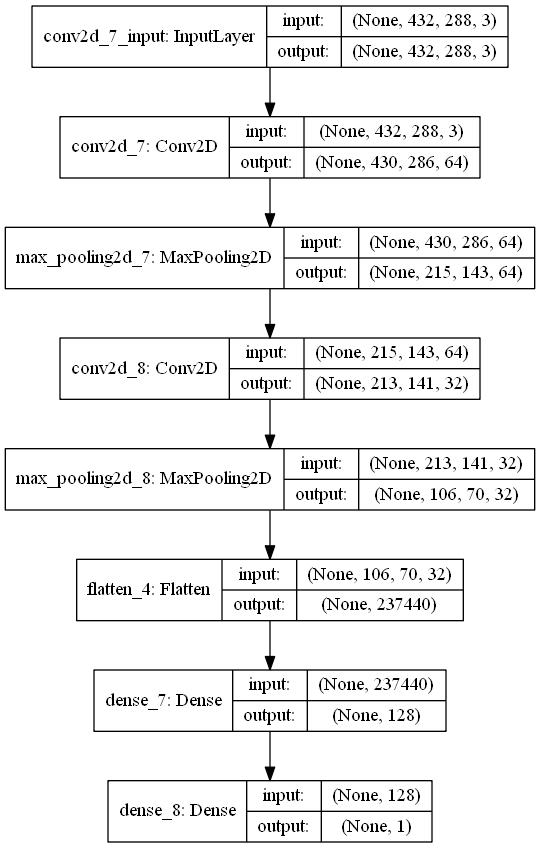

In [11]:
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
    # plot_model(Write the name of the network i.e. model/classifier etc.,to_file='Name of the figure.jpeg',show_shapes=True,show_layer_names=True)
network=os.getcwd()+'\\2D_CNN.jpeg'
plot_model(classifier_X,to_file=network,show_shapes=True,show_layer_names=True)

In [10]:
Network_3_X=[]
for key in cols_1:
    print('Training of CNN for Joint: '+str(key+1)+' initiated')
    classifier_X.fit_generator(train_set[key],steps_per_epoch=8,epochs=10,
                             validation_data=test_set[key],validation_steps=4)
    Network_3_X.append(classifier_X)
    print('Training of CNN for Joint: '+str(key+1)+' completed')
    print("\n")

Training of CNN for Joint: 1 initiated

Epoch 1/10
8/8 [==============================] - 4s 440ms/step - loss: 12.2256 - accuracy: 0.5938 - val_loss: 1.9489 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 103ms/step - loss: 2.0917 - accuracy: 0.5938 - val_loss: 1.0225 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.8707 - accuracy: 0.5625 - val_loss: 0.7662 - val_accuracy: 0.3125
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.7051 - accuracy: 0.4375 - val_loss: 0.6931 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.6937 - accuracy: 0.4375 - val_loss: 0.6931 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.6933 - accuracy: 0.4688 - val_loss: 0.6926 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - 

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.3533 - accuracy: 0.8750 - val_loss: 1.9202 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2947 - accuracy: 0.8438 - val_loss: 0.8137 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2914 - accuracy: 0.9062 - val_loss: 2.1050 - val_accuracy: 0.5625
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2669 - accuracy: 0.9375 - val_loss: 0.2622 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2400 - accuracy: 0.9062 - val_loss: 1.3143 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1545 - accuracy: 0.9375 - val_loss: 0.6607 - val_accuracy: 0.6250
Training of CNN for Joint: 6 completed


Training of CNN for Joint: 7 initiated
Epoch 1/10
8/8 [==============================] - 1s 147ms/step - loss: 0.4369 

8/8 [==============================] - 1s 103ms/step - loss: 0.5227 - accuracy: 0.8125 - val_loss: 0.5616 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2917 - accuracy: 0.9062 - val_loss: 0.5484 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.4152 - accuracy: 0.8438 - val_loss: 1.0667 - val_accuracy: 0.5625
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.3384 - accuracy: 0.9062 - val_loss: 0.8826 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2845 - accuracy: 0.8750 - val_loss: 2.1518 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.1585 - accuracy: 0.9375 - val_loss: 1.0502 - val_accuracy: 0.6875
Training of CNN for Joint: 17 completed


Training of CNN for Joint: 18 initiated
Epoch 1/10
8/8 [==============================] - 1s 151ms/step - loss: 0.4445 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.2873 - accuracy: 0.9062 - val_loss: 0.4823 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.3676 - accuracy: 0.8750 - val_loss: 1.0911 - val_accuracy: 0.8125
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2239 - accuracy: 0.9062 - val_loss: 0.4155 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0912 - accuracy: 0.9688 - val_loss: 2.5155 - val_accuracy: 0.5000
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0780 - accuracy: 0.9688 - val_loss: 2.2954 - val_accuracy: 0.5625
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1077 - accuracy: 0.9688 - val_loss: 1.4185 - val_accuracy: 0.4375
Training of CNN for Joint: 28 completed


Training of CNN for Joint: 29 initiated
Epoch 1/10
8/8 [==============================] - 1s 158ms/step - loss: 0.8086 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.4242 - accuracy: 0.8125 - val_loss: 0.4557 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.3527 - accuracy: 0.7812 - val_loss: 0.7612 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2639 - accuracy: 0.9062 - val_loss: 0.5969 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1167 - accuracy: 0.9688 - val_loss: 0.3425 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1859 - accuracy: 0.9062 - val_loss: 0.4290 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2455 - accuracy: 0.9062 - val_loss: 1.2443 - val_accuracy: 0.5625
Training of CNN for Joint: 39 completed


Training of CNN for Joint: 40 initiated
Epoch 1/10
8/8 [==============================] - 1s 155ms/step - loss: 0.3262 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.6451 - accuracy: 0.6875 - val_loss: 0.7631 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 104ms/step - loss: 0.6359 - accuracy: 0.7188 - val_loss: 0.6796 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.5763 - accuracy: 0.8125 - val_loss: 0.6401 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.5728 - accuracy: 0.6875 - val_loss: 0.5401 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.5657 - accuracy: 0.8125 - val_loss: 0.5449 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.5113 - accuracy: 0.8750 - val_loss: 0.9125 - val_accuracy: 0.6250
Training of CNN for Joint: 50 completed


Training of CNN for Joint: 51 initiated
Epoch 1/10
8/8 [==============================] - 1s 152ms/step - loss: 0.6552 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.2148 - accuracy: 0.9062 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 104ms/step - loss: 0.1418 - accuracy: 0.9688 - val_loss: 0.9235 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0426 - accuracy: 0.9688 - val_loss: 1.3985 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.3506 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.3251 - val_accuracy: 0.6875
Training of CNN for Joint: 61 completed


Training of CNN for Joint: 62 initiated
Epoch 1/10
8/8 [==============================] - 1s 148ms/step - loss: 0.4876 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.7019 - accuracy: 0.4062 - val_loss: 0.6574 - val_accuracy: 0.3750
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.6707 - accuracy: 0.5625 - val_loss: 0.7202 - val_accuracy: 0.4375
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6486 - val_accuracy: 0.5000
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.6663 - accuracy: 0.6250 - val_loss: 0.6261 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.6673 - accuracy: 0.5625 - val_loss: 0.6990 - val_accuracy: 0.5625
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.6356 - accuracy: 0.6562 - val_loss: 0.6097 - val_accuracy: 0.6250
Training of CNN for Joint: 72 completed


Training of CNN for Joint: 73 initiated
Epoch 1/10
8/8 [==============================] - 1s 117ms/step - loss: 0.6156 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.2578 - accuracy: 0.8750 - val_loss: 0.7868 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2115 - accuracy: 0.9375 - val_loss: 0.0471 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1733 - accuracy: 0.9062 - val_loss: 0.7910 - val_accuracy: 0.5625
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1189 - accuracy: 0.9688 - val_loss: 2.3122 - val_accuracy: 0.5625
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1708 - accuracy: 0.9375 - val_loss: 0.6770 - val_accuracy: 0.5625
Epoch 10/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0970 - accuracy: 0.9688 - val_loss: 0.7280 - val_accuracy: 0.5625
Training of CNN for Joint: 83 completed


Training of CNN for Joint: 84 initiated
Epoch 1/10
8/8 [==============================] - 1s 117ms/step - loss: 0.3045 - accurac

8/8 [==============================] - 1s 103ms/step - loss: 0.1900 - accuracy: 0.9688 - val_loss: 0.2411 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2085 - accuracy: 0.9062 - val_loss: 1.2227 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1069 - accuracy: 0.9688 - val_loss: 2.1460 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0719 - accuracy: 1.0000 - val_loss: 1.0027 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.3527 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 2.2830 - val_accuracy: 0.6875
Training of CNN for Joint: 94 completed


Training of CNN for Joint: 95 initiated
Epoch 1/10
8/8 [==============================] - 1s 122ms/step - loss: 0.4200 - accurac

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0722 - accuracy: 1.0000 - val_loss: 0.5289 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.5635 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.9113 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 1.8467 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.7296 - val_accuracy: 0.6875
Training of CNN for Joint: 105 completed


Training of CNN for Joint: 106 initiated
Epoch 1/10
8/8 [==============================] - 1s 116ms/step - loss: 0.1

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.6392 - accuracy: 0.5938 - val_loss: 0.7055 - val_accuracy: 0.4375
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.5433 - accuracy: 0.7188 - val_loss: 0.8114 - val_accuracy: 0.4375
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.5912 - accuracy: 0.5938 - val_loss: 0.6701 - val_accuracy: 0.4375
Epoch 8/10
8/8 [==============================] - 1s 104ms/step - loss: 0.5261 - accuracy: 0.7188 - val_loss: 0.6977 - val_accuracy: 0.4375
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.6061 - accuracy: 0.6250 - val_loss: 0.5723 - val_accuracy: 0.5000
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.5649 - accuracy: 0.6875 - val_loss: 0.7257 - val_accuracy: 0.5000
Training of CNN for Joint: 116 completed


Training of CNN for Joint: 117 initiated
Epoch 1/10
8/8 [==============================] - 1s 118ms/step - loss: 0.5

Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1620 - accuracy: 0.9375 - val_loss: 0.1793 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 106ms/step - loss: 0.2220 - accuracy: 0.9062 - val_loss: 0.0184 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0908 - accuracy: 1.0000 - val_loss: 1.9748 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 1.6859 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0427 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 1.3019 - val_accuracy: 0.6875
Training of CNN for Joint: 127 completed


Training of CNN for Joint: 128 initiated
Epoch 1/10
8/8 [==============================] - 1s 118ms/step - loss: 0.2

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.3157 - accuracy: 0.8750 - val_loss: 1.1369 - val_accuracy: 0.4375
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.3200 - accuracy: 0.8125 - val_loss: 0.8873 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0816 - accuracy: 0.9375 - val_loss: 0.1420 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 2.1182 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1867 - accuracy: 0.9062 - val_loss: 5.4236 - val_accuracy: 0.4375
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.2209 - accuracy: 0.9688 - val_loss: 0.9241 - val_accuracy: 0.6875
Training of CNN for Joint: 138 completed


Training of CNN for Joint: 139 initiated
Epoch 1/10
8/8 [==============================] - 1s 120ms/step - loss: 0.5

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0600 - accuracy: 0.9688 - val_loss: 1.0742 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0501 - accuracy: 0.9688 - val_loss: 3.7731 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 1.6869 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 3.4237 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 3.3800 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 8.7578e-04 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.6875
Training of CNN for Joint: 149 completed


Training of CNN for Joint: 150 initiated
Epoch 1/10
8/8 [==============================] - 1s 120ms/step - loss:

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0989 - accuracy: 0.9688 - val_loss: 0.8469 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.9561 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 4.8274 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 2.8565 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.6875
Training of CNN for Joint: 160 completed


Training of CNN for Joint: 161 initiated
Epoch 1/10
8/8 [==============================] - 1s 111ms/step - loss: 0.4

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2428 - accuracy: 0.9062 - val_loss: 0.2761 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0734 - accuracy: 0.9688 - val_loss: 0.1942 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0884 - accuracy: 0.9688 - val_loss: 2.8736 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 1.9498 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0488 - accuracy: 1.0000 - val_loss: 0.5738 - val_accuracy: 0.7500
Training of CNN for Joint: 171 completed


Training of CNN for Joint: 172 initiated
Epoch 1/10
8/8 [==============================] - 1s 123ms/step - loss: 0.3

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0722 - accuracy: 1.0000 - val_loss: 1.8985e-04 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 0.8125
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 4.0712 - val_accuracy: 0.8125
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1253 - val_accuracy: 0.8125
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 4.8215 - val_accuracy: 0.8125
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.8125
Training of CNN for Joint: 183 completed


Training of CNN for Joint: 184 initiated
Epoch 1/10
8/8 [==============================] - 1s 118ms/step - loss:

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0652 - accuracy: 0.9688 - val_loss: 4.3843 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0722 - accuracy: 0.9688 - val_loss: 0.8300 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1039 - accuracy: 0.9688 - val_loss: 1.3388 - val_accuracy: 0.5000
Epoch 8/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.1917 - val_accuracy: 0.5625
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 2.7617 - val_accuracy: 0.5625
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.9388 - val_accuracy: 0.5625
Training of CNN for Joint: 194 completed


Training of CNN for Joint: 195 initiated
Epoch 1/10
8/8 [==============================] - 1s 119ms/step - loss: 0.0

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1206 - accuracy: 0.9375 - val_loss: 1.5241 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1295 - accuracy: 0.9688 - val_loss: 0.2683 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 2.0601 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0947 - accuracy: 0.9688 - val_loss: 4.9862 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0388 - accuracy: 0.9688 - val_loss: 1.0690 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.8868 - val_accuracy: 0.6875
Training of CNN for Joint: 205 completed


Training of CNN for Joint: 206 initiated
Epoch 1/10
8/8 [==============================] - 1s 117ms/step - loss: 0.0

Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0539 - accuracy: 1.0000 - val_loss: 0.1468 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0833 - accuracy: 0.9688 - val_loss: 2.5589 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.5625
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 1.6764 - val_accuracy: 0.5625
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 1.1022 - val_accuracy: 0.5625
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.1585 - val_accuracy: 0.5625
Training of CNN for Joint: 216 completed


Training of CNN for Joint: 217 initiated
Epoch 1/10
8/8 [==============================] - 1s 116ms/step - loss: 0.3

Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 1.3987 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 1.2734 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.2978 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0357 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.7500
Training of CNN for Joint: 227 completed


Training of CNN for Joint: 228 initiated
Epoch 1/10
8/8 [==============================] - 1s 122ms/step - loss: 0.1

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0332 - accuracy: 0.9688 - val_loss: 4.4308 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 3.0551 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.8117 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.5538 - val_accuracy: 0.7500
Training of CNN for Joint: 238 completed


Training of CNN for Joint: 239 initiated
Epoch 1/10
8/8 [==============================] - 1s 114ms/step - loss: 0.0

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0872 - accuracy: 0.9688 - val_loss: 0.2472 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0726 - accuracy: 1.0000 - val_loss: 2.0213 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0796 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0509 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 2.7236 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 1.6411 - val_accuracy: 0.7500
Training of CNN for Joint: 249 completed


Training of CNN for Joint: 250 initiated
Epoch 1/10
8/8 [==============================] - 1s 119ms/step - loss: 0.1

Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.5642 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0318 - accuracy: 0.9688 - val_loss: 0.5329 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.5769 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.9461 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2350 - val_accuracy: 0.6875
Training of CNN for Joint: 260 completed


Training of CNN for Joint: 261 initiated
Epoch 1/10
8/8 [==============================] - 1s 120ms/step - loss: 0.1

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.2202 - val_accuracy: 0.8125
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 0.8125
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.8125
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 6.0192e-04 - accuracy: 1.0000 - val_loss: 6.0247 - val_accuracy: 0.8125
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 6.0706 - val_accuracy: 0.8125
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.3289 - val_accuracy: 0.8125
Training of CNN for Joint: 271 completed


Training of CNN for Joint: 272 initiated
Epoch 1/10
8/8 [==============================] - 1s 117ms/step - loss:

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.8232 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 2.4911 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2934 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.0869 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 2.5363 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.9057 - val_accuracy: 0.6250
Training of CNN for Joint: 282 completed


Training of CNN for Joint: 283 initiated
Epoch 1/10
8/8 [==============================] - 1s 119ms/step - loss: 0.0

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 2.8672 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 2.7320 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.4211 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 2.9396 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.4891e-04 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.6339 - val_accuracy: 0.6875
Training of CNN for Joint: 294 completed


Training of CNN for Joint: 295 initiated
Epoch 1/10
8/8 [==============================] - 1s 114ms/step - loss:

Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.8321 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0468 - accuracy: 0.9688 - val_loss: 5.2560 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0514 - accuracy: 0.9688 - val_loss: 3.2774 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9191 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6324 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.9829 - val_accuracy: 0.6250
Training of CNN for Joint: 305 completed


Training of CNN for Joint: 306 initiated
Epoch 1/10
8/8 [==============================] - 1s 113ms/step - loss: 0.3

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 4.4845 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 8.9059 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 5.1022 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 3.2680 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 6.1645 - val_accuracy: 0.6875
Training of CNN for Joint: 316 completed


Training of CNN for Joint: 317 initiated
Epoch 1/10
8/8 [==============================] - 1s 117ms/step - loss: 0.0

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.3879 - val_accuracy: 0.8125
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2167 - accuracy: 0.9375 - val_loss: 1.6151 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2398 - accuracy: 0.8750 - val_loss: 0.4476 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0701 - accuracy: 0.9688 - val_loss: 0.0494 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3312 - val_accuracy: 0.8125
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.3891 - val_accuracy: 0.8125
Training of CNN for Joint: 327 completed


Training of CNN for Joint: 328 initiated
Epoch 1/10
8/8 [==============================] - 1s 117ms/step - loss: 0.1

Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 3.1229 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.4417 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.6233 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.9630 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.2459 - val_accuracy: 0.7500
Training of CNN for Joint: 339 completed


Training of CNN for Joint: 340 initiated
Epoch 1/10
8/8 [==============================] - 1s 119ms/step - loss: 0.0

8/8 [==============================] - 1s 105ms/step - loss: 7.2860e-04 - accuracy: 1.0000 - val_loss: 0.4455 - val_accuracy: 0.7500
Training of CNN for Joint: 344 completed


Training of CNN for Joint: 345 initiated
Epoch 1/10
8/8 [==============================] - 1s 113ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4949 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.4290 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 6.5887e-04 - accuracy: 1.0000 - val_loss: 3.5279 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0016 

Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.7030 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 4.1413 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.2624 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 7.6331e-04 - accuracy: 1.0000 - val_loss: 0.1351 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.1822 - val_accuracy: 0.6250
Training of CNN for Joint: 350 completed


Training of CNN for Joint: 351 initiated
Epoch 1/10
8/8 [==============================] - 1s 114ms/step - loss:

8/8 [==============================] - 1s 105ms/step - loss: 0.0393 - accuracy: 0.9688 - val_loss: 1.1733 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.4758 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2539 - accuracy: 0.9688 - val_loss: 4.1710 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3202 - val_accuracy: 0.7500
Training of CNN for Joint: 361

Epoch 4/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1047 - accuracy: 0.9688 - val_loss: 0.6777 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.7014 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.4825 - val_accuracy: 0.8125
Epoch 9/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.8125
Epoch 10/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1238 - val_accuracy: 0.8125
Training of CNN for

Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0501 - accuracy: 0.9688 - val_loss: 0.0049 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 7.3395 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 1.6273 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.3969 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.8143 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.6170 - val_accuracy: 0.7500
Epoch 10/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.0792 - val_accuracy: 0.7500
Training of CNN for

Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2010 - accuracy: 0.9688 - val_loss: 0.0079 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2367 - accuracy: 0.9375 - val_loss: 0.1338 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1781 - accuracy: 0.9375 - val_loss: 3.7245 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0732 - accuracy: 0.9375 - val_loss: 0.7357 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1448 - accuracy: 0.9375 - val_loss: 0.5784 - val_accuracy: 0.6875
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.6875
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0826 - accuracy: 0.9688 - val_loss: 1.8637 - val_accuracy: 0.7500
Training of CNN for

Epoch 4/10
8/8 [==============================] - 1s 106ms/step - loss: 0.1736 - accuracy: 0.9375 - val_loss: 7.5488 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 3.4368 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 6.8976 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 6.5508 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.1704 - val_accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3055 - val_accuracy: 0.6250
Training of CNN for

8/8 [==============================] - 1s 103ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 13.1687 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 1.9172 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.9900 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 4.0627e-04 - accuracy: 1.0000 - val_loss: 2.9554 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 5.1476e-04 - accuracy: 1.0000 - val_loss: 11.3739 - val_accuracy: 0.7500
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 7.6856e-04 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.7500
Epoch 10/10
8/8 [

Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.8125
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.1555 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.1748 - val_accuracy: 0.8125
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 1.3141 - val_accuracy: 0.8125
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.8125
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 9.6146 - val_accuracy: 0.8125
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 9.4819 - val_accuracy: 0.8125
Epoch 10/10
8/8 [===

Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 1.0274 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.4662 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0739 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 3.6401e-05 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.3210 - val_accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.8991 - val_accuracy: 0.6250
Epoch 9/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 2.5876 - val_accuracy: 0.6250
Epoch 10/10
8/8 

## Plotting the Network

In [42]:
# import graphviz
# import pydot_ng as pydot  
# pydot.find_graphviz()

In [43]:
# import os
# from keras.utils.vis_utils import plot_model
# from keras.utils.vis_utils import model_to_dot
# # plot_model(Write the name of the network i.e. model/classifier etc.,to_file='Name of the figure.jpeg',show_shapes=True,show_layer_names=True)
# network=os.getcwd()+'\\2D_CNN.jpeg'
# plot_model(classifier_X,to_file=network,show_shapes=True,show_layer_names=True)

# # Network_name.summary()
# # classifier_X.summary()

### Saving the Model

In [46]:
Three_Layered_Two_D_CNN_X_model_json=classifier_X.to_json()
with open("Three_Layered_Two_D_CNN_X_model.json","w") as json_file:
    json_file.write(Three_Layered_Two_D_CNN_X_model_json)
classifier_X.save_weights("Three_Layered_Two_D_CNN_X_model.h5")
print("Saved Network to disk")

Saved Network to disk


### Loading the saved model

In [48]:
# # Loading the Saved Network 
# from keras.models import model_from_json
# json_file=open('Three_Layered_Two_D_CNN_X_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# # Loading Weights into Loaded Model
# loaded_model.load_weights("Three_Layered_Two_D_CNN_X_model.h5")
# print("Loaded the model from disk")

Loaded the model from disk


### EFFICIENCY FROM X-AXIS TRAINING

In [18]:
scores_3_X=0
efficiency_3_X=0
for key,index in zip(cols_1,range(437)):
    scores_3_X=scores_3_X + Network_3_X[index].evaluate_generator(test_set[key])[1]
efficiency_3_X=(scores_3_X/n.shape(Network_3_X)[0])*100
print("\nEfficiency Obtained from 2D CNN Network on X Axis of Test Dataset is: "+ str(efficiency_3_X)+"%")


Efficiency Obtained from 2D CNN Network on X Axis of Test Dataset is: 71.79633867276888%


In [19]:
del train_datagen,test_datagen,train_set,test_set

### Y-Axis Accelerometer Recordings

In [20]:
train_datagen={}
test_datagen={}
train_set={}
test_set={}

In [24]:
for key in cols_1:
    list_Y_Tr=glob.glob(path_2+"Joint_"+str(key)+"\\Train\\")
    for file_Y_Tr in list_Y_Tr:
        train_datagen[key]=ImageDataGenerator(rescale=1./255)
        train_set[key]=train_datagen[key].flow_from_directory(file_Y_Tr,target_size=(432,288), batch_size=4,
                                                              classes=['Damaged','Undamaged'],class_mode='binary')
 
    list_Y_Te=glob.glob(path_2+"Joint_"+str(key)+"\\Test\\")
    for  file_Y_Te in list_Y_Te:
        test_datagen[key]=ImageDataGenerator(rescale=1./255)
        test_set[key]=train_datagen[key].flow_from_directory(file_Y_Te,target_size=(432,288), batch_size=4,
                                                             classes=['Damaged','Undamaged'],class_mode='binary')
        

Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 58 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [25]:
classifier_Y = Sequential()
classifier_Y.add(Convolution2D(64,3,3,input_shape=(432,288,3),activation='relu'))
classifier_Y.add(MaxPooling2D(pool_size=(2,2)))
classifier_Y.add(Convolution2D(32,3,3,activation='relu'))
classifier_Y.add(MaxPooling2D(pool_size=(2,2)))
classifier_Y.add(Flatten())

classifier_Y.add(Dense(output_dim=128,activation='relu'))
classifier_Y.add(Dense(output_dim=1,activation='sigmoid'))
classifier_Y.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(432, 288,..., activation="relu")`
  
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  if __name__ == '__main__':


In [26]:
Network_3_Y=[]
for key in cols_1:
    print('Training of CNN for Joint: '+str(key+1)+' initiated')
    classifier_Y.fit_generator(train_set[key],steps_per_epoch=8,epochs=10,
                             validation_data=test_set[key],validation_steps=4)
    Network_3_Y.append(classifier_Y)
    print('Training of CNN for Joint: '+str(key+1)+' completed')
    print("\n")

Training of CNN for Joint: 1 initiated
Epoch 1/10
8/8 [==============================] - 2s 224ms/step - loss: 3.7198 - accuracy: 0.4375 - val_loss: 1.1390 - val_accuracy: 0.3125
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.8281 - accuracy: 0.4375 - val_loss: 0.6003 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7128 - accuracy: 0.4375 - val_loss: 0.6924 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 145ms/step - loss: 0.6934 - accuracy: 0.4375 - val_loss: 0.6937 - val_accuracy: 0.3125
Epoch 5/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6931 - accuracy: 0.5312 - val_loss: 0.6943 - val_accuracy: 0.3125
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6929 - accuracy: 0.5625 - val_loss: 0.6932 - val_accuracy: 0.3125
Epoch 7/10
8/8 [==============================] - 1s 145ms/step - loss: 0.6930 - accuracy: 0.5312 - val_loss: 0.6971 - va

8/8 [==============================] - 1s 156ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.7287 - val_accuracy: 0.3125
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6871 - accuracy: 0.5625 - val_loss: 0.6941 - val_accuracy: 0.3125
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6870 - accuracy: 0.5625 - val_loss: 0.7293 - val_accuracy: 0.3125
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6870 - accuracy: 0.5625 - val_loss: 0.7636 - val_accuracy: 0.3125
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6912 - accuracy: 0.5312 - val_loss: 0.7297 - val_accuracy: 0.3125
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.7083 - accuracy: 0.4062 - val_loss: 0.6954 - val_accuracy: 0.3125
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6831 - accuracy: 0.5938 - val_loss: 0.6953 - val_accuracy: 0.3125
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 159ms/step - loss: 0.7876 - accuracy: 0.5000 - val_loss: 0.5655 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.7026 - accuracy: 0.4688 - val_loss: 0.6089 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7743 - accuracy: 0.3750 - val_loss: 0.5640 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6746 - accuracy: 0.6562 - val_loss: 0.5909 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 142ms/step - loss: 0.6880 - accuracy: 0.5625 - val_loss: 0.5997 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6925 - accuracy: 0.5312 - val_loss: 0.6976 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 158ms/step - loss: 0.5734 - accuracy: 0.7500 - val_loss: 0.7205 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.4909 - accuracy: 0.8750 - val_loss: 1.0221 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.5476 - accuracy: 0.7188 - val_loss: 0.5528 - val_accuracy: 0.5625
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.4943 - accuracy: 0.8125 - val_loss: 1.2815 - val_accuracy: 0.5625
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.4085 - accuracy: 0.8438 - val_loss: 0.3023 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.5219 - accuracy: 0.7812 - val_loss: 0.6599 - val_accuracy: 0.5625
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.4293 - accuracy: 0.9062 - val_loss: 1.0205 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 159ms/step - loss: 1.7571 - accuracy: 0.5312 - val_loss: 0.8005 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6774 - accuracy: 0.6562 - val_loss: 0.1999 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6762 - accuracy: 0.5000 - val_loss: 0.8971 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6968 - accuracy: 0.4375 - val_loss: 0.5644 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6919 - accuracy: 0.5625 - val_loss: 0.5636 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.7241 - accuracy: 0.4062 - val_loss: 0.5629 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7148 - accuracy: 0.5312 - val_loss: 0.2871 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 159ms/step - loss: 0.2689 - accuracy: 0.9062 - val_loss: 1.9338 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.3055 - accuracy: 0.8750 - val_loss: 0.0502 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.1507 - accuracy: 0.9375 - val_loss: 1.2002 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 1s 143ms/step - loss: 0.1653 - accuracy: 0.9375 - val_loss: 0.3745 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 144ms/step - loss: 0.1719 - accuracy: 0.9062 - val_loss: 3.3161 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.1388 - accuracy: 0.9688 - val_loss: 1.1149 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.3694 - accuracy: 0.8125 - val_loss: 0.4758 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 157ms/step - loss: 2.1526 - accuracy: 0.3750 - val_loss: 1.1574 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.8638 - accuracy: 0.5000 - val_loss: 0.5805 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7840 - accuracy: 0.4375 - val_loss: 1.1215 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7307 - accuracy: 0.5312 - val_loss: 0.5673 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6929 - accuracy: 0.4062 - val_loss: 0.5711 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7051 - accuracy: 0.4688 - val_loss: 0.3582 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 142ms/step - loss: 0.7044 - accuracy: 0.5000 - val_loss: 0.5683 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 161ms/step - loss: 0.1126 - accuracy: 0.9688 - val_loss: 0.5603 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0634 - accuracy: 1.0000 - val_loss: 1.6127 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0553 - accuracy: 1.0000 - val_loss: 4.0013 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.8589 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0467 - accuracy: 0.9688 - val_loss: 2.3723 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 1.0756 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 163ms/step - loss: 0.6656 - accuracy: 0.7188 - val_loss: 4.5244 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 1.4196 - accuracy: 0.5000 - val_loss: 2.6455 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.8334 - accuracy: 0.5625 - val_loss: 1.4336 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.7240 - accuracy: 0.5000 - val_loss: 0.6023 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6935 - accuracy: 0.5312 - val_loss: 0.1897 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6996 - accuracy: 0.5000 - val_loss: 0.5770 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 142ms/step - loss: 0.6989 - accuracy: 0.5312 - val_loss: 1.3133 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 159ms/step - loss: 0.0984 - accuracy: 0.9688 - val_loss: 1.1051 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.4532 - accuracy: 0.9375 - val_loss: 0.0018 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 1.7878 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0612 - accuracy: 0.9688 - val_loss: 1.0015 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.3091 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.7595 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.9210 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 161ms/step - loss: 0.9237 - accuracy: 0.6250 - val_loss: 0.6145 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7669 - accuracy: 0.5000 - val_loss: 1.0726 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 142ms/step - loss: 0.7957 - accuracy: 0.3125 - val_loss: 1.0375 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7276 - accuracy: 0.4062 - val_loss: 0.5834 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7342 - accuracy: 0.5625 - val_loss: 0.5785 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7267 - accuracy: 0.5312 - val_loss: 1.0063 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7223 - accuracy: 0.4375 - val_loss: 0.9843 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 160ms/step - loss: 0.1466 - accuracy: 0.9375 - val_loss: 1.2828 - val_accuracy: 0.8125
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.3361 - accuracy: 0.8750 - val_loss: 1.2953 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.3998 - accuracy: 0.9688 - val_loss: 0.9184 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.1831 - accuracy: 0.9375 - val_loss: 0.2831 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.2528 - accuracy: 0.8438 - val_loss: 0.3676 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 2.4133 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 4.4868 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 159ms/step - loss: 0.9895 - accuracy: 0.5000 - val_loss: 0.0013 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7952 - accuracy: 0.5938 - val_loss: 2.9454 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7192 - accuracy: 0.5625 - val_loss: 1.2153 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6885 - accuracy: 0.6250 - val_loss: 2.0070 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7136 - accuracy: 0.5938 - val_loss: 1.8628 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6989 - accuracy: 0.5625 - val_loss: 0.9116 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7053 - accuracy: 0.5312 - val_loss: 0.0346 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 160ms/step - loss: 0.0453 - accuracy: 0.9688 - val_loss: 2.6337 - val_accuracy: 0.6250
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.1513 - accuracy: 0.9375 - val_loss: 1.9587 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0604 - accuracy: 0.9688 - val_loss: 1.8046 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 2.1178 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.5342 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 142ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.6501 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 160ms/step - loss: 2.6715 - accuracy: 0.3750 - val_loss: 3.4499 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 1.1326 - accuracy: 0.5312 - val_loss: 1.8882 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7035 - accuracy: 0.5625 - val_loss: 1.4052 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.7966 - accuracy: 0.4375 - val_loss: 0.6588 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7138 - accuracy: 0.4062 - val_loss: 0.6128 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7149 - accuracy: 0.5000 - val_loss: 0.9629 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7150 - accuracy: 0.5000 - val_loss: 0.5789 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 162ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.6152 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.6010 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 2.3819 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.6107 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.1444 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 162ms/step - loss: 1.8065 - accuracy: 0.3438 - val_loss: 1.1992 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.9533 - accuracy: 0.5000 - val_loss: 0.6365 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7146 - accuracy: 0.4375 - val_loss: 0.7609 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.7102 - accuracy: 0.4688 - val_loss: 0.3309 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 142ms/step - loss: 0.7142 - accuracy: 0.4375 - val_loss: 0.3357 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6738 - accuracy: 0.6250 - val_loss: 0.7957 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.7237 - accuracy: 0.4375 - val_loss: 0.3399 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 158ms/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 1.9356 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.3101 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.2148 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.9472 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2797 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.3793 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 142ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.6137 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 155ms/step - loss: 0.5253 - accuracy: 0.7188 - val_loss: 0.5168 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 1.5014 - accuracy: 0.7812 - val_loss: 0.8398 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 1s 143ms/step - loss: 0.6026 - accuracy: 0.6875 - val_loss: 0.2779 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 144ms/step - loss: 0.4361 - accuracy: 0.8750 - val_loss: 0.2710 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 143ms/step - loss: 0.3913 - accuracy: 0.8125 - val_loss: 1.1554 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.4478 - accuracy: 0.8125 - val_loss: 0.8412 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.2560 - accuracy: 0.9375 - val_loss: 0.5407 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 118ms/step - loss: 0.1091 - accuracy: 0.9688 - val_loss: 1.5752 - val_accuracy: 0.6250
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0461 - accuracy: 0.9688 - val_loss: 0.4250 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.0447 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 3.9035 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 1.6637 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.7207 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 121ms/step - loss: 1.2566 - accuracy: 0.6250 - val_loss: 0.6268 - val_accuracy: 0.4375
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.6737 - accuracy: 0.7500 - val_loss: 0.9598 - val_accuracy: 0.4375
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.4706 - accuracy: 0.8125 - val_loss: 0.7288 - val_accuracy: 0.4375
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.5512 - accuracy: 0.6875 - val_loss: 0.4898 - val_accuracy: 0.4375
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.3488 - accuracy: 0.8125 - val_loss: 0.7476 - val_accuracy: 0.4375
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.3141 - accuracy: 0.9375 - val_loss: 0.6358 - val_accuracy: 0.4375
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2508 - accuracy: 0.9062 - val_loss: 0.3960 - val_accuracy: 0.5000
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 119ms/step - loss: 0.0888 - accuracy: 0.9375 - val_loss: 0.0422 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.1740 - accuracy: 0.9375 - val_loss: 0.0028 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0536 - accuracy: 0.9688 - val_loss: 0.3458 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4.9722 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 10.5213 - val_accuracy: 0.6875
Epoch 8/10
8/8 [==============

8/8 [==============================] - 1s 115ms/step - loss: 0.8094 - accuracy: 0.7812 - val_loss: 0.9676 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 1s 105ms/step - loss: 0.8463 - accuracy: 0.5938 - val_loss: 0.6603 - val_accuracy: 0.5625
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2519 - accuracy: 0.9062 - val_loss: 0.6440 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 106ms/step - loss: 0.4110 - accuracy: 0.7812 - val_loss: 0.7188 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2656 - accuracy: 0.8750 - val_loss: 0.7855 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.1666 - accuracy: 0.9688 - val_loss: 0.2120 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1446 - accuracy: 0.9375 - val_loss: 0.2379 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 122ms/step - loss: 0.0713 - accuracy: 0.9688 - val_loss: 0.1787 - val_accuracy: 0.8125
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0578 - accuracy: 0.9688 - val_loss: 1.0770 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.6234 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.8783 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.8052 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0267 - accuracy: 1.0000 - val_loss: 0.8241 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.8170 - val_accuracy: 0.7500
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 121ms/step - loss: 1.1431 - accuracy: 0.6250 - val_loss: 2.1506 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.3405 - accuracy: 0.8438 - val_loss: 1.6959 - val_accuracy: 0.5625
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.3266 - accuracy: 0.8438 - val_loss: 0.7089 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.3173 - accuracy: 0.8750 - val_loss: 1.0084 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1777 - accuracy: 0.9375 - val_loss: 3.3596 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.1351 - accuracy: 1.0000 - val_loss: 1.1287 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1369 - accuracy: 0.9375 - val_loss: 0.5722 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 122ms/step - loss: 0.0438 - accuracy: 0.9688 - val_loss: 0.2746 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.2434 - accuracy: 0.9062 - val_loss: 0.2447 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1775 - accuracy: 0.9062 - val_loss: 1.2718 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.3273 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2413 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0352 - accuracy: 0.9688 - val_loss: 1.4385 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 3.4118 - val_accuracy: 0.7500
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 121ms/step - loss: 0.4640 - accuracy: 0.8438 - val_loss: 0.1044 - val_accuracy: 0.8125
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.2848 - accuracy: 0.8750 - val_loss: 0.7318 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2288 - accuracy: 0.8750 - val_loss: 0.1084 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.1180 - accuracy: 0.9688 - val_loss: 0.4625 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0864 - accuracy: 0.9688 - val_loss: 0.2723 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.7500
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 116ms/step - loss: 0.1211 - accuracy: 0.9062 - val_loss: 2.4231 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.3146 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 108ms/step - loss: 0.1196 - accuracy: 0.9688 - val_loss: 6.7653e-05 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0370 - accuracy: 0.9688 - val_loss: 3.1035 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.5625 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 1.3365 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===========

8/8 [==============================] - 1s 121ms/step - loss: 0.6417 - accuracy: 0.7500 - val_loss: 0.2056 - val_accuracy: 0.8750
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.2740 - accuracy: 0.8750 - val_loss: 0.3104 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.2309 - accuracy: 0.9062 - val_loss: 0.5214 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.1453 - accuracy: 0.9375 - val_loss: 0.8053 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0716 - accuracy: 1.0000 - val_loss: 0.8558 - val_accuracy: 0.8125
Epoch 6/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0596 - accuracy: 1.0000 - val_loss: 0.3547 - val_accuracy: 0.8125
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0475 - accuracy: 0.9688 - val_loss: 0.3998 - val_accuracy: 0.8125
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 123ms/step - loss: 0.1141 - accuracy: 0.9688 - val_loss: 2.9931 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.1246 - accuracy: 0.9375 - val_loss: 0.6881 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.8005 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.9077 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0933 - accuracy: 0.9688 - val_loss: 2.7649 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 121ms/step - loss: 0.3928 - accuracy: 0.7812 - val_loss: 1.0401 - val_accuracy: 0.6250
Epoch 2/10
8/8 [==============================] - 1s 105ms/step - loss: 0.5938 - accuracy: 0.8125 - val_loss: 1.1015 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.2293 - accuracy: 0.9062 - val_loss: 0.7061 - val_accuracy: 0.5625
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1559 - accuracy: 0.9375 - val_loss: 0.7476 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0856 - accuracy: 0.9688 - val_loss: 0.3072 - val_accuracy: 0.5625
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1202 - accuracy: 0.9688 - val_loss: 1.5624 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.8535 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 116ms/step - loss: 0.1174 - accuracy: 0.9375 - val_loss: 4.3326 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 1s 103ms/step - loss: 0.3674 - accuracy: 0.8438 - val_loss: 0.0046 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 6.1864 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0680 - accuracy: 0.9688 - val_loss: 2.0908 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 1.9750 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 9.5600e-05 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 2.7138 - val_accuracy: 0.7500
Epoch 8/10
8/8 [===========

8/8 [==============================] - 1s 111ms/step - loss: 0.5051 - accuracy: 0.7500 - val_loss: 1.1918 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 1s 102ms/step - loss: 0.4983 - accuracy: 0.8438 - val_loss: 0.6521 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1656 - accuracy: 0.9375 - val_loss: 0.4900 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0825 - accuracy: 1.0000 - val_loss: 2.5680 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0458 - accuracy: 1.0000 - val_loss: 1.6468 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0491 - accuracy: 0.9688 - val_loss: 2.4747 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 2.1507 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 117ms/step - loss: 0.0739 - accuracy: 0.9688 - val_loss: 0.7469 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0770 - accuracy: 0.9688 - val_loss: 0.8225 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0484 - accuracy: 0.9688 - val_loss: 0.0086 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 5.5753e-04 - val_accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0619 - accuracy: 0.9375 - val_loss: 0.6786 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0379 - accuracy: 0.9688 - val_loss: 3.8157 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 2.3221 - val_accuracy: 0.6875
Epoch 8/10
8/8 [===========

8/8 [==============================] - 1s 112ms/step - loss: 0.5879 - accuracy: 0.6875 - val_loss: 0.1887 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.2027 - accuracy: 0.9375 - val_loss: 0.9658 - val_accuracy: 0.5625
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1716 - accuracy: 0.8750 - val_loss: 0.4520 - val_accuracy: 0.8125
Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.2207 - accuracy: 0.9062 - val_loss: 0.5350 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.1703 - accuracy: 0.9375 - val_loss: 1.2708 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.3184 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0721 - accuracy: 0.9688 - val_loss: 0.5024 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 115ms/step - loss: 0.1857 - accuracy: 0.9062 - val_loss: 2.9330 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.2286 - accuracy: 0.9375 - val_loss: 1.5007 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.1955 - val_accuracy: 0.6250
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.0383 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.1120 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.2822 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.6406 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 116ms/step - loss: 0.3278 - accuracy: 0.8438 - val_loss: 1.3677 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 1s 103ms/step - loss: 0.3087 - accuracy: 0.8438 - val_loss: 3.7545 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1825 - accuracy: 0.9062 - val_loss: 1.3602 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 104ms/step - loss: 0.0790 - accuracy: 1.0000 - val_loss: 6.2118 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0746 - accuracy: 0.9688 - val_loss: 4.5438 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.2906 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 158ms/step - loss: 0.0683 - accuracy: 0.9688 - val_loss: 1.2156 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 1s 144ms/step - loss: 0.0613 - accuracy: 0.9688 - val_loss: 0.0159 - val_accuracy: 0.8125
Epoch 3/10
8/8 [==============================] - 1s 142ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.4571 - val_accuracy: 0.8125
Epoch 4/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0851 - accuracy: 0.9688 - val_loss: 1.7716 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 1s 142ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.8401 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 1s 143ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 4.4597 - val_accuracy: 0.7500
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 114ms/step - loss: 0.3445 - accuracy: 0.7812 - val_loss: 0.7907 - val_accuracy: 0.6250
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.2430 - accuracy: 0.9062 - val_loss: 1.2131 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.1352 - accuracy: 0.9375 - val_loss: 1.5785 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 0.1286 - accuracy: 0.9688 - val_loss: 1.0416 - val_accuracy: 0.6250
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0795 - accuracy: 0.9688 - val_loss: 1.2834 - val_accuracy: 0.6250
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0918 - accuracy: 0.9688 - val_loss: 0.8419 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.6121 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===============

8/8 [==============================] - 1s 116ms/step - loss: 0.2282 - accuracy: 0.9375 - val_loss: 0.0013 - val_accuracy: 0.8125
Epoch 2/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.3340 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.9974 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 1s 102ms/step - loss: 0.0383 - accuracy: 0.9688 - val_loss: 4.4061 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 1s 103ms/step - loss: 5.7004e-04 - accuracy: 1.0000 - val_loss: 1.2738 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.9781 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 2.7917 - val_accuracy: 0.6250
Epoch 8/10
8/8 [===========

In [44]:
Three_Layered_Two_D_CNN_Y_model_json=classifier_Y.to_json()
with open("Three_Layered_Two_D_CNN_Y_model.json","w") as json_file:
    json_file.write(Three_Layered_Two_D_CNN_Y_model_json)
classifier_Y.save_weights("Three_Layered_Two_D_CNN_Y_model.h5")
print("Saved Network to disk")

Saved Network to disk


In [ ]:
# # Loading the Saved Network 
# from keras.models import model_from_json
# json_file=open('Three_Layered_Two_D_CNN_Y_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# # Loading Weights into Loaded Model
# loaded_model.load_weights("Three_Layered_Two_D_CNN_Y_model.h5")
# print("Loaded the model from disk")

### OVERALL EFFICIENCY FROM TRAINING

In [40]:
scores_3_Y=0
efficiency_3_Y=0
for key, index in zip(cols_1,range(437)):
    scores_3_Y=scores_3_Y+Network_3_Y[index].evaluate_generator(test_set[key])[1]

efficiency_3_Y=(scores_3_Y/n.shape(Network_3_Y)[0])*100
print("\nEfficiency Obtained from 2D CNN Network on Y-Axis of Test Dataset is: "+ str(efficiency_3_Y)+"%")

scores_3=scores_3_X+scores_3_Y
efficiency_3=(scores_3)/((n.shape(cols_1))[0]*2)
print("\nEfficiency Obtained from 2D CNN Network on  Test Dataset is: "+ str(efficiency_3)+"%")


Efficiency Obtained from 2D CNN Network on Y-Axis of Test Dataset is: 69.05034324942791%

Efficiency Obtained from 2D CNN Network on  Test Dataset is: 0.704233409610984%


In [41]:
# for key in range(6):
#     test_loss, test_acc = classifier.evaluate(X_Output[key], y_Output[key])
#     print('Test Loss of: {}'.format(test_loss))
#     print('Test Accuracy: {}'.format(test_acc))